In [1]:
import ee
import datetime
import os
import itertools
import sys
import collections

from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geemap

import subprocess
from subprocess import PIPE

In [2]:
ee.Initialize()

# append the parent path into sys-path so wen can import necessary modules
sys.path.append('../')

In [3]:
from BackGround_modules.Class_1_Make_fourier_imgs import Make_Fourier
from BackGround_modules.Class_2_Classify_Fourier_Img import Classification
from BackGround_modules.Class_3_Calculate_the_accuracy import Accuracy_assesment

The default supplementary data a Zero img, change accordingly when classify other years imgs



#### Step_0_Define_Basic_Parameters

In [4]:
# imprt North_China_Plain boundary
North_China_Plain = ee.FeatureCollection("users/wangjinzhulala/North_China_Plain_Python/Boundary_shp/North_China_Plain_Boundary")

In [5]:
# Define the time-range
# just get one_range from every different sensors
year_range = [(f'{i}-01-01',f'2019-12-31') for i in range(2015,2020)] + \
             [(f'{i}-01-01',f'2013-12-31') for i in range(2009,2014)] + \
             [(f'{i}-01-01',f'2010-12-31') for i in range(2006,2011)]


In [6]:
year_range

[('2015-01-01', '2019-12-31'),
 ('2016-01-01', '2019-12-31'),
 ('2017-01-01', '2019-12-31'),
 ('2018-01-01', '2019-12-31'),
 ('2019-01-01', '2019-12-31'),
 ('2009-01-01', '2013-12-31'),
 ('2010-01-01', '2013-12-31'),
 ('2011-01-01', '2013-12-31'),
 ('2012-01-01', '2013-12-31'),
 ('2013-01-01', '2013-12-31'),
 ('2006-01-01', '2010-12-31'),
 ('2007-01-01', '2010-12-31'),
 ('2008-01-01', '2010-12-31'),
 ('2009-01-01', '2010-12-31'),
 ('2010-01-01', '2010-12-31')]

#### Step_2_Triple loop to create GEE_instaces for later residule computation

In [7]:
# randomly generated 100 point within the boundary of North China Plain
# which will be used to record the residul between original and fitted
# normalized value
point_num = 100
random_point = ee.FeatureCollection.randomPoints(North_China_Plain, point_num, 101).toList(point_num).getInfo()

# define the max harmonic number that will be tested
harmo_num = 10

In [8]:
# innitialize the list that holds residule vlaue
point_with_residule = {}

# define an operation flag to record the number of operations
op_flag   = 0
op_totall = len(year_range) * harmo_num * point_num

# __________________________________loop through the year_range________________________________
for span in year_range:
    
    # define the start and end of time
    start = span[0]
    end   = span[1]
    spane_len = str(int(end[:4]) - int(start[:4]))
    
    # get span_name for export
    split = '-'
    span_name = f'{start.split(split)[0]}_{end.split(split)[0]}'
    
    # innitilize a 1st level dict to hold residule-value of span_name-[harmonic]
    point_with_residule[span_name] = {}
    
    # __________________________________loop through harmonics ________________________________
    for harmonic in range(1,harmo_num + 1):

        # make a residule img 
        Fourier_making = Make_Fourier(start_date=start,end_date=end,harmonics=harmonic)
        Fourier_making.Stp_1_Create_hamonic_names()
        Fourier_making.Stp_2_Add_harmonics()
        Fourier_making.Stp_3_Harmonic_fit()

        # get the Residule img.
        Residule_img = ee.ImageCollection(Fourier_making.harmonicTrendResidule)

        
        # innitilize the 2ed level dict to hold residule-value of span_name_harmonic-[point_num]
        point_with_residule[span_name][harmonic] = {}
        
        # ______________________________loop through each point _______________________________
        for pt in random_point:
            
            # updata the opration number
            op_flag += 1
            
            # get the id of the point
            pt_id = pt['id']
            
            # calculate the residule, this is ght 3rd level of the dict
            point_with_residule[span_name][harmonic][int(pt_id)] = Residule_img.getRegion(pt['geometry'],30)

            #print out the process out point calculation
            print(f'{span_name}_harmonic_{harmonic}_pt_{pt_id.zfill(2)}. ==>{str(op_flag).zfill(5)}/{op_totall}')

        # print out the process of Harmonic
        print(f'_____Harmonic_{harmonic}____')

        
    # print out the process of year_span
    print(f'===============|{span_name}|==================')

Analyzing the images of 2015_2019
2015_2019_harmonic_1_pt_00. ==>00001/15000
2015_2019_harmonic_1_pt_01. ==>00002/15000
2015_2019_harmonic_1_pt_02. ==>00003/15000
2015_2019_harmonic_1_pt_03. ==>00004/15000
2015_2019_harmonic_1_pt_04. ==>00005/15000
2015_2019_harmonic_1_pt_05. ==>00006/15000
2015_2019_harmonic_1_pt_06. ==>00007/15000
2015_2019_harmonic_1_pt_07. ==>00008/15000
2015_2019_harmonic_1_pt_08. ==>00009/15000
2015_2019_harmonic_1_pt_09. ==>00010/15000
2015_2019_harmonic_1_pt_10. ==>00011/15000
2015_2019_harmonic_1_pt_11. ==>00012/15000
2015_2019_harmonic_1_pt_12. ==>00013/15000
2015_2019_harmonic_1_pt_13. ==>00014/15000
2015_2019_harmonic_1_pt_14. ==>00015/15000
2015_2019_harmonic_1_pt_15. ==>00016/15000
2015_2019_harmonic_1_pt_16. ==>00017/15000
2015_2019_harmonic_1_pt_17. ==>00018/15000
2015_2019_harmonic_1_pt_18. ==>00019/15000
2015_2019_harmonic_1_pt_19. ==>00020/15000
2015_2019_harmonic_1_pt_20. ==>00021/15000
2015_2019_harmonic_1_pt_21. ==>00022/15000
2015_2019_harmonic_1

Analyzing the images of 2015_2019
2015_2019_harmonic_3_pt_00. ==>00201/15000
2015_2019_harmonic_3_pt_01. ==>00202/15000
2015_2019_harmonic_3_pt_02. ==>00203/15000
2015_2019_harmonic_3_pt_03. ==>00204/15000
2015_2019_harmonic_3_pt_04. ==>00205/15000
2015_2019_harmonic_3_pt_05. ==>00206/15000
2015_2019_harmonic_3_pt_06. ==>00207/15000
2015_2019_harmonic_3_pt_07. ==>00208/15000
2015_2019_harmonic_3_pt_08. ==>00209/15000
2015_2019_harmonic_3_pt_09. ==>00210/15000
2015_2019_harmonic_3_pt_10. ==>00211/15000
2015_2019_harmonic_3_pt_11. ==>00212/15000
2015_2019_harmonic_3_pt_12. ==>00213/15000
2015_2019_harmonic_3_pt_13. ==>00214/15000
2015_2019_harmonic_3_pt_14. ==>00215/15000
2015_2019_harmonic_3_pt_15. ==>00216/15000
2015_2019_harmonic_3_pt_16. ==>00217/15000
2015_2019_harmonic_3_pt_17. ==>00218/15000
2015_2019_harmonic_3_pt_18. ==>00219/15000
2015_2019_harmonic_3_pt_19. ==>00220/15000
2015_2019_harmonic_3_pt_20. ==>00221/15000
2015_2019_harmonic_3_pt_21. ==>00222/15000
2015_2019_harmonic_3

Analyzing the images of 2015_2019
2015_2019_harmonic_5_pt_00. ==>00401/15000
2015_2019_harmonic_5_pt_01. ==>00402/15000
2015_2019_harmonic_5_pt_02. ==>00403/15000
2015_2019_harmonic_5_pt_03. ==>00404/15000
2015_2019_harmonic_5_pt_04. ==>00405/15000
2015_2019_harmonic_5_pt_05. ==>00406/15000
2015_2019_harmonic_5_pt_06. ==>00407/15000
2015_2019_harmonic_5_pt_07. ==>00408/15000
2015_2019_harmonic_5_pt_08. ==>00409/15000
2015_2019_harmonic_5_pt_09. ==>00410/15000
2015_2019_harmonic_5_pt_10. ==>00411/15000
2015_2019_harmonic_5_pt_11. ==>00412/15000
2015_2019_harmonic_5_pt_12. ==>00413/15000
2015_2019_harmonic_5_pt_13. ==>00414/15000
2015_2019_harmonic_5_pt_14. ==>00415/15000
2015_2019_harmonic_5_pt_15. ==>00416/15000
2015_2019_harmonic_5_pt_16. ==>00417/15000
2015_2019_harmonic_5_pt_17. ==>00418/15000
2015_2019_harmonic_5_pt_18. ==>00419/15000
2015_2019_harmonic_5_pt_19. ==>00420/15000
2015_2019_harmonic_5_pt_20. ==>00421/15000
2015_2019_harmonic_5_pt_21. ==>00422/15000
2015_2019_harmonic_5

Analyzing the images of 2015_2019
2015_2019_harmonic_7_pt_00. ==>00601/15000
2015_2019_harmonic_7_pt_01. ==>00602/15000
2015_2019_harmonic_7_pt_02. ==>00603/15000
2015_2019_harmonic_7_pt_03. ==>00604/15000
2015_2019_harmonic_7_pt_04. ==>00605/15000
2015_2019_harmonic_7_pt_05. ==>00606/15000
2015_2019_harmonic_7_pt_06. ==>00607/15000
2015_2019_harmonic_7_pt_07. ==>00608/15000
2015_2019_harmonic_7_pt_08. ==>00609/15000
2015_2019_harmonic_7_pt_09. ==>00610/15000
2015_2019_harmonic_7_pt_10. ==>00611/15000
2015_2019_harmonic_7_pt_11. ==>00612/15000
2015_2019_harmonic_7_pt_12. ==>00613/15000
2015_2019_harmonic_7_pt_13. ==>00614/15000
2015_2019_harmonic_7_pt_14. ==>00615/15000
2015_2019_harmonic_7_pt_15. ==>00616/15000
2015_2019_harmonic_7_pt_16. ==>00617/15000
2015_2019_harmonic_7_pt_17. ==>00618/15000
2015_2019_harmonic_7_pt_18. ==>00619/15000
2015_2019_harmonic_7_pt_19. ==>00620/15000
2015_2019_harmonic_7_pt_20. ==>00621/15000
2015_2019_harmonic_7_pt_21. ==>00622/15000
2015_2019_harmonic_7

Analyzing the images of 2015_2019
2015_2019_harmonic_9_pt_00. ==>00801/15000
2015_2019_harmonic_9_pt_01. ==>00802/15000
2015_2019_harmonic_9_pt_02. ==>00803/15000
2015_2019_harmonic_9_pt_03. ==>00804/15000
2015_2019_harmonic_9_pt_04. ==>00805/15000
2015_2019_harmonic_9_pt_05. ==>00806/15000
2015_2019_harmonic_9_pt_06. ==>00807/15000
2015_2019_harmonic_9_pt_07. ==>00808/15000
2015_2019_harmonic_9_pt_08. ==>00809/15000
2015_2019_harmonic_9_pt_09. ==>00810/15000
2015_2019_harmonic_9_pt_10. ==>00811/15000
2015_2019_harmonic_9_pt_11. ==>00812/15000
2015_2019_harmonic_9_pt_12. ==>00813/15000
2015_2019_harmonic_9_pt_13. ==>00814/15000
2015_2019_harmonic_9_pt_14. ==>00815/15000
2015_2019_harmonic_9_pt_15. ==>00816/15000
2015_2019_harmonic_9_pt_16. ==>00817/15000
2015_2019_harmonic_9_pt_17. ==>00818/15000
2015_2019_harmonic_9_pt_18. ==>00819/15000
2015_2019_harmonic_9_pt_19. ==>00820/15000
2015_2019_harmonic_9_pt_20. ==>00821/15000
2015_2019_harmonic_9_pt_21. ==>00822/15000
2015_2019_harmonic_9

Analyzing the images of 2016_2019
2016_2019_harmonic_1_pt_00. ==>01001/15000
2016_2019_harmonic_1_pt_01. ==>01002/15000
2016_2019_harmonic_1_pt_02. ==>01003/15000
2016_2019_harmonic_1_pt_03. ==>01004/15000
2016_2019_harmonic_1_pt_04. ==>01005/15000
2016_2019_harmonic_1_pt_05. ==>01006/15000
2016_2019_harmonic_1_pt_06. ==>01007/15000
2016_2019_harmonic_1_pt_07. ==>01008/15000
2016_2019_harmonic_1_pt_08. ==>01009/15000
2016_2019_harmonic_1_pt_09. ==>01010/15000
2016_2019_harmonic_1_pt_10. ==>01011/15000
2016_2019_harmonic_1_pt_11. ==>01012/15000
2016_2019_harmonic_1_pt_12. ==>01013/15000
2016_2019_harmonic_1_pt_13. ==>01014/15000
2016_2019_harmonic_1_pt_14. ==>01015/15000
2016_2019_harmonic_1_pt_15. ==>01016/15000
2016_2019_harmonic_1_pt_16. ==>01017/15000
2016_2019_harmonic_1_pt_17. ==>01018/15000
2016_2019_harmonic_1_pt_18. ==>01019/15000
2016_2019_harmonic_1_pt_19. ==>01020/15000
2016_2019_harmonic_1_pt_20. ==>01021/15000
2016_2019_harmonic_1_pt_21. ==>01022/15000
2016_2019_harmonic_1

Analyzing the images of 2016_2019
2016_2019_harmonic_3_pt_00. ==>01201/15000
2016_2019_harmonic_3_pt_01. ==>01202/15000
2016_2019_harmonic_3_pt_02. ==>01203/15000
2016_2019_harmonic_3_pt_03. ==>01204/15000
2016_2019_harmonic_3_pt_04. ==>01205/15000
2016_2019_harmonic_3_pt_05. ==>01206/15000
2016_2019_harmonic_3_pt_06. ==>01207/15000
2016_2019_harmonic_3_pt_07. ==>01208/15000
2016_2019_harmonic_3_pt_08. ==>01209/15000
2016_2019_harmonic_3_pt_09. ==>01210/15000
2016_2019_harmonic_3_pt_10. ==>01211/15000
2016_2019_harmonic_3_pt_11. ==>01212/15000
2016_2019_harmonic_3_pt_12. ==>01213/15000
2016_2019_harmonic_3_pt_13. ==>01214/15000
2016_2019_harmonic_3_pt_14. ==>01215/15000
2016_2019_harmonic_3_pt_15. ==>01216/15000
2016_2019_harmonic_3_pt_16. ==>01217/15000
2016_2019_harmonic_3_pt_17. ==>01218/15000
2016_2019_harmonic_3_pt_18. ==>01219/15000
2016_2019_harmonic_3_pt_19. ==>01220/15000
2016_2019_harmonic_3_pt_20. ==>01221/15000
2016_2019_harmonic_3_pt_21. ==>01222/15000
2016_2019_harmonic_3

Analyzing the images of 2016_2019
2016_2019_harmonic_5_pt_00. ==>01401/15000
2016_2019_harmonic_5_pt_01. ==>01402/15000
2016_2019_harmonic_5_pt_02. ==>01403/15000
2016_2019_harmonic_5_pt_03. ==>01404/15000
2016_2019_harmonic_5_pt_04. ==>01405/15000
2016_2019_harmonic_5_pt_05. ==>01406/15000
2016_2019_harmonic_5_pt_06. ==>01407/15000
2016_2019_harmonic_5_pt_07. ==>01408/15000
2016_2019_harmonic_5_pt_08. ==>01409/15000
2016_2019_harmonic_5_pt_09. ==>01410/15000
2016_2019_harmonic_5_pt_10. ==>01411/15000
2016_2019_harmonic_5_pt_11. ==>01412/15000
2016_2019_harmonic_5_pt_12. ==>01413/15000
2016_2019_harmonic_5_pt_13. ==>01414/15000
2016_2019_harmonic_5_pt_14. ==>01415/15000
2016_2019_harmonic_5_pt_15. ==>01416/15000
2016_2019_harmonic_5_pt_16. ==>01417/15000
2016_2019_harmonic_5_pt_17. ==>01418/15000
2016_2019_harmonic_5_pt_18. ==>01419/15000
2016_2019_harmonic_5_pt_19. ==>01420/15000
2016_2019_harmonic_5_pt_20. ==>01421/15000
2016_2019_harmonic_5_pt_21. ==>01422/15000
2016_2019_harmonic_5

Analyzing the images of 2016_2019
2016_2019_harmonic_7_pt_00. ==>01601/15000
2016_2019_harmonic_7_pt_01. ==>01602/15000
2016_2019_harmonic_7_pt_02. ==>01603/15000
2016_2019_harmonic_7_pt_03. ==>01604/15000
2016_2019_harmonic_7_pt_04. ==>01605/15000
2016_2019_harmonic_7_pt_05. ==>01606/15000
2016_2019_harmonic_7_pt_06. ==>01607/15000
2016_2019_harmonic_7_pt_07. ==>01608/15000
2016_2019_harmonic_7_pt_08. ==>01609/15000
2016_2019_harmonic_7_pt_09. ==>01610/15000
2016_2019_harmonic_7_pt_10. ==>01611/15000
2016_2019_harmonic_7_pt_11. ==>01612/15000
2016_2019_harmonic_7_pt_12. ==>01613/15000
2016_2019_harmonic_7_pt_13. ==>01614/15000
2016_2019_harmonic_7_pt_14. ==>01615/15000
2016_2019_harmonic_7_pt_15. ==>01616/15000
2016_2019_harmonic_7_pt_16. ==>01617/15000
2016_2019_harmonic_7_pt_17. ==>01618/15000
2016_2019_harmonic_7_pt_18. ==>01619/15000
2016_2019_harmonic_7_pt_19. ==>01620/15000
2016_2019_harmonic_7_pt_20. ==>01621/15000
2016_2019_harmonic_7_pt_21. ==>01622/15000
2016_2019_harmonic_7

Analyzing the images of 2016_2019
2016_2019_harmonic_9_pt_00. ==>01801/15000
2016_2019_harmonic_9_pt_01. ==>01802/15000
2016_2019_harmonic_9_pt_02. ==>01803/15000
2016_2019_harmonic_9_pt_03. ==>01804/15000
2016_2019_harmonic_9_pt_04. ==>01805/15000
2016_2019_harmonic_9_pt_05. ==>01806/15000
2016_2019_harmonic_9_pt_06. ==>01807/15000
2016_2019_harmonic_9_pt_07. ==>01808/15000
2016_2019_harmonic_9_pt_08. ==>01809/15000
2016_2019_harmonic_9_pt_09. ==>01810/15000
2016_2019_harmonic_9_pt_10. ==>01811/15000
2016_2019_harmonic_9_pt_11. ==>01812/15000
2016_2019_harmonic_9_pt_12. ==>01813/15000
2016_2019_harmonic_9_pt_13. ==>01814/15000
2016_2019_harmonic_9_pt_14. ==>01815/15000
2016_2019_harmonic_9_pt_15. ==>01816/15000
2016_2019_harmonic_9_pt_16. ==>01817/15000
2016_2019_harmonic_9_pt_17. ==>01818/15000
2016_2019_harmonic_9_pt_18. ==>01819/15000
2016_2019_harmonic_9_pt_19. ==>01820/15000
2016_2019_harmonic_9_pt_20. ==>01821/15000
2016_2019_harmonic_9_pt_21. ==>01822/15000
2016_2019_harmonic_9

Analyzing the images of 2017_2019
2017_2019_harmonic_1_pt_00. ==>02001/15000
2017_2019_harmonic_1_pt_01. ==>02002/15000
2017_2019_harmonic_1_pt_02. ==>02003/15000
2017_2019_harmonic_1_pt_03. ==>02004/15000
2017_2019_harmonic_1_pt_04. ==>02005/15000
2017_2019_harmonic_1_pt_05. ==>02006/15000
2017_2019_harmonic_1_pt_06. ==>02007/15000
2017_2019_harmonic_1_pt_07. ==>02008/15000
2017_2019_harmonic_1_pt_08. ==>02009/15000
2017_2019_harmonic_1_pt_09. ==>02010/15000
2017_2019_harmonic_1_pt_10. ==>02011/15000
2017_2019_harmonic_1_pt_11. ==>02012/15000
2017_2019_harmonic_1_pt_12. ==>02013/15000
2017_2019_harmonic_1_pt_13. ==>02014/15000
2017_2019_harmonic_1_pt_14. ==>02015/15000
2017_2019_harmonic_1_pt_15. ==>02016/15000
2017_2019_harmonic_1_pt_16. ==>02017/15000
2017_2019_harmonic_1_pt_17. ==>02018/15000
2017_2019_harmonic_1_pt_18. ==>02019/15000
2017_2019_harmonic_1_pt_19. ==>02020/15000
2017_2019_harmonic_1_pt_20. ==>02021/15000
2017_2019_harmonic_1_pt_21. ==>02022/15000
2017_2019_harmonic_1

Analyzing the images of 2017_2019
2017_2019_harmonic_3_pt_00. ==>02201/15000
2017_2019_harmonic_3_pt_01. ==>02202/15000
2017_2019_harmonic_3_pt_02. ==>02203/15000
2017_2019_harmonic_3_pt_03. ==>02204/15000
2017_2019_harmonic_3_pt_04. ==>02205/15000
2017_2019_harmonic_3_pt_05. ==>02206/15000
2017_2019_harmonic_3_pt_06. ==>02207/15000
2017_2019_harmonic_3_pt_07. ==>02208/15000
2017_2019_harmonic_3_pt_08. ==>02209/15000
2017_2019_harmonic_3_pt_09. ==>02210/15000
2017_2019_harmonic_3_pt_10. ==>02211/15000
2017_2019_harmonic_3_pt_11. ==>02212/15000
2017_2019_harmonic_3_pt_12. ==>02213/15000
2017_2019_harmonic_3_pt_13. ==>02214/15000
2017_2019_harmonic_3_pt_14. ==>02215/15000
2017_2019_harmonic_3_pt_15. ==>02216/15000
2017_2019_harmonic_3_pt_16. ==>02217/15000
2017_2019_harmonic_3_pt_17. ==>02218/15000
2017_2019_harmonic_3_pt_18. ==>02219/15000
2017_2019_harmonic_3_pt_19. ==>02220/15000
2017_2019_harmonic_3_pt_20. ==>02221/15000
2017_2019_harmonic_3_pt_21. ==>02222/15000
2017_2019_harmonic_3

Analyzing the images of 2017_2019
2017_2019_harmonic_5_pt_00. ==>02401/15000
2017_2019_harmonic_5_pt_01. ==>02402/15000
2017_2019_harmonic_5_pt_02. ==>02403/15000
2017_2019_harmonic_5_pt_03. ==>02404/15000
2017_2019_harmonic_5_pt_04. ==>02405/15000
2017_2019_harmonic_5_pt_05. ==>02406/15000
2017_2019_harmonic_5_pt_06. ==>02407/15000
2017_2019_harmonic_5_pt_07. ==>02408/15000
2017_2019_harmonic_5_pt_08. ==>02409/15000
2017_2019_harmonic_5_pt_09. ==>02410/15000
2017_2019_harmonic_5_pt_10. ==>02411/15000
2017_2019_harmonic_5_pt_11. ==>02412/15000
2017_2019_harmonic_5_pt_12. ==>02413/15000
2017_2019_harmonic_5_pt_13. ==>02414/15000
2017_2019_harmonic_5_pt_14. ==>02415/15000
2017_2019_harmonic_5_pt_15. ==>02416/15000
2017_2019_harmonic_5_pt_16. ==>02417/15000
2017_2019_harmonic_5_pt_17. ==>02418/15000
2017_2019_harmonic_5_pt_18. ==>02419/15000
2017_2019_harmonic_5_pt_19. ==>02420/15000
2017_2019_harmonic_5_pt_20. ==>02421/15000
2017_2019_harmonic_5_pt_21. ==>02422/15000
2017_2019_harmonic_5

Analyzing the images of 2017_2019
2017_2019_harmonic_7_pt_00. ==>02601/15000
2017_2019_harmonic_7_pt_01. ==>02602/15000
2017_2019_harmonic_7_pt_02. ==>02603/15000
2017_2019_harmonic_7_pt_03. ==>02604/15000
2017_2019_harmonic_7_pt_04. ==>02605/15000
2017_2019_harmonic_7_pt_05. ==>02606/15000
2017_2019_harmonic_7_pt_06. ==>02607/15000
2017_2019_harmonic_7_pt_07. ==>02608/15000
2017_2019_harmonic_7_pt_08. ==>02609/15000
2017_2019_harmonic_7_pt_09. ==>02610/15000
2017_2019_harmonic_7_pt_10. ==>02611/15000
2017_2019_harmonic_7_pt_11. ==>02612/15000
2017_2019_harmonic_7_pt_12. ==>02613/15000
2017_2019_harmonic_7_pt_13. ==>02614/15000
2017_2019_harmonic_7_pt_14. ==>02615/15000
2017_2019_harmonic_7_pt_15. ==>02616/15000
2017_2019_harmonic_7_pt_16. ==>02617/15000
2017_2019_harmonic_7_pt_17. ==>02618/15000
2017_2019_harmonic_7_pt_18. ==>02619/15000
2017_2019_harmonic_7_pt_19. ==>02620/15000
2017_2019_harmonic_7_pt_20. ==>02621/15000
2017_2019_harmonic_7_pt_21. ==>02622/15000
2017_2019_harmonic_7

Analyzing the images of 2017_2019
2017_2019_harmonic_9_pt_00. ==>02801/15000
2017_2019_harmonic_9_pt_01. ==>02802/15000
2017_2019_harmonic_9_pt_02. ==>02803/15000
2017_2019_harmonic_9_pt_03. ==>02804/15000
2017_2019_harmonic_9_pt_04. ==>02805/15000
2017_2019_harmonic_9_pt_05. ==>02806/15000
2017_2019_harmonic_9_pt_06. ==>02807/15000
2017_2019_harmonic_9_pt_07. ==>02808/15000
2017_2019_harmonic_9_pt_08. ==>02809/15000
2017_2019_harmonic_9_pt_09. ==>02810/15000
2017_2019_harmonic_9_pt_10. ==>02811/15000
2017_2019_harmonic_9_pt_11. ==>02812/15000
2017_2019_harmonic_9_pt_12. ==>02813/15000
2017_2019_harmonic_9_pt_13. ==>02814/15000
2017_2019_harmonic_9_pt_14. ==>02815/15000
2017_2019_harmonic_9_pt_15. ==>02816/15000
2017_2019_harmonic_9_pt_16. ==>02817/15000
2017_2019_harmonic_9_pt_17. ==>02818/15000
2017_2019_harmonic_9_pt_18. ==>02819/15000
2017_2019_harmonic_9_pt_19. ==>02820/15000
2017_2019_harmonic_9_pt_20. ==>02821/15000
2017_2019_harmonic_9_pt_21. ==>02822/15000
2017_2019_harmonic_9

Analyzing the images of 2018_2019
2018_2019_harmonic_1_pt_00. ==>03001/15000
2018_2019_harmonic_1_pt_01. ==>03002/15000
2018_2019_harmonic_1_pt_02. ==>03003/15000
2018_2019_harmonic_1_pt_03. ==>03004/15000
2018_2019_harmonic_1_pt_04. ==>03005/15000
2018_2019_harmonic_1_pt_05. ==>03006/15000
2018_2019_harmonic_1_pt_06. ==>03007/15000
2018_2019_harmonic_1_pt_07. ==>03008/15000
2018_2019_harmonic_1_pt_08. ==>03009/15000
2018_2019_harmonic_1_pt_09. ==>03010/15000
2018_2019_harmonic_1_pt_10. ==>03011/15000
2018_2019_harmonic_1_pt_11. ==>03012/15000
2018_2019_harmonic_1_pt_12. ==>03013/15000
2018_2019_harmonic_1_pt_13. ==>03014/15000
2018_2019_harmonic_1_pt_14. ==>03015/15000
2018_2019_harmonic_1_pt_15. ==>03016/15000
2018_2019_harmonic_1_pt_16. ==>03017/15000
2018_2019_harmonic_1_pt_17. ==>03018/15000
2018_2019_harmonic_1_pt_18. ==>03019/15000
2018_2019_harmonic_1_pt_19. ==>03020/15000
2018_2019_harmonic_1_pt_20. ==>03021/15000
2018_2019_harmonic_1_pt_21. ==>03022/15000
2018_2019_harmonic_1

Analyzing the images of 2018_2019
2018_2019_harmonic_3_pt_00. ==>03201/15000
2018_2019_harmonic_3_pt_01. ==>03202/15000
2018_2019_harmonic_3_pt_02. ==>03203/15000
2018_2019_harmonic_3_pt_03. ==>03204/15000
2018_2019_harmonic_3_pt_04. ==>03205/15000
2018_2019_harmonic_3_pt_05. ==>03206/15000
2018_2019_harmonic_3_pt_06. ==>03207/15000
2018_2019_harmonic_3_pt_07. ==>03208/15000
2018_2019_harmonic_3_pt_08. ==>03209/15000
2018_2019_harmonic_3_pt_09. ==>03210/15000
2018_2019_harmonic_3_pt_10. ==>03211/15000
2018_2019_harmonic_3_pt_11. ==>03212/15000
2018_2019_harmonic_3_pt_12. ==>03213/15000
2018_2019_harmonic_3_pt_13. ==>03214/15000
2018_2019_harmonic_3_pt_14. ==>03215/15000
2018_2019_harmonic_3_pt_15. ==>03216/15000
2018_2019_harmonic_3_pt_16. ==>03217/15000
2018_2019_harmonic_3_pt_17. ==>03218/15000
2018_2019_harmonic_3_pt_18. ==>03219/15000
2018_2019_harmonic_3_pt_19. ==>03220/15000
2018_2019_harmonic_3_pt_20. ==>03221/15000
2018_2019_harmonic_3_pt_21. ==>03222/15000
2018_2019_harmonic_3

Analyzing the images of 2018_2019
2018_2019_harmonic_5_pt_00. ==>03401/15000
2018_2019_harmonic_5_pt_01. ==>03402/15000
2018_2019_harmonic_5_pt_02. ==>03403/15000
2018_2019_harmonic_5_pt_03. ==>03404/15000
2018_2019_harmonic_5_pt_04. ==>03405/15000
2018_2019_harmonic_5_pt_05. ==>03406/15000
2018_2019_harmonic_5_pt_06. ==>03407/15000
2018_2019_harmonic_5_pt_07. ==>03408/15000
2018_2019_harmonic_5_pt_08. ==>03409/15000
2018_2019_harmonic_5_pt_09. ==>03410/15000
2018_2019_harmonic_5_pt_10. ==>03411/15000
2018_2019_harmonic_5_pt_11. ==>03412/15000
2018_2019_harmonic_5_pt_12. ==>03413/15000
2018_2019_harmonic_5_pt_13. ==>03414/15000
2018_2019_harmonic_5_pt_14. ==>03415/15000
2018_2019_harmonic_5_pt_15. ==>03416/15000
2018_2019_harmonic_5_pt_16. ==>03417/15000
2018_2019_harmonic_5_pt_17. ==>03418/15000
2018_2019_harmonic_5_pt_18. ==>03419/15000
2018_2019_harmonic_5_pt_19. ==>03420/15000
2018_2019_harmonic_5_pt_20. ==>03421/15000
2018_2019_harmonic_5_pt_21. ==>03422/15000
2018_2019_harmonic_5

Analyzing the images of 2018_2019
2018_2019_harmonic_7_pt_00. ==>03601/15000
2018_2019_harmonic_7_pt_01. ==>03602/15000
2018_2019_harmonic_7_pt_02. ==>03603/15000
2018_2019_harmonic_7_pt_03. ==>03604/15000
2018_2019_harmonic_7_pt_04. ==>03605/15000
2018_2019_harmonic_7_pt_05. ==>03606/15000
2018_2019_harmonic_7_pt_06. ==>03607/15000
2018_2019_harmonic_7_pt_07. ==>03608/15000
2018_2019_harmonic_7_pt_08. ==>03609/15000
2018_2019_harmonic_7_pt_09. ==>03610/15000
2018_2019_harmonic_7_pt_10. ==>03611/15000
2018_2019_harmonic_7_pt_11. ==>03612/15000
2018_2019_harmonic_7_pt_12. ==>03613/15000
2018_2019_harmonic_7_pt_13. ==>03614/15000
2018_2019_harmonic_7_pt_14. ==>03615/15000
2018_2019_harmonic_7_pt_15. ==>03616/15000
2018_2019_harmonic_7_pt_16. ==>03617/15000
2018_2019_harmonic_7_pt_17. ==>03618/15000
2018_2019_harmonic_7_pt_18. ==>03619/15000
2018_2019_harmonic_7_pt_19. ==>03620/15000
2018_2019_harmonic_7_pt_20. ==>03621/15000
2018_2019_harmonic_7_pt_21. ==>03622/15000
2018_2019_harmonic_7

Analyzing the images of 2018_2019
2018_2019_harmonic_9_pt_00. ==>03801/15000
2018_2019_harmonic_9_pt_01. ==>03802/15000
2018_2019_harmonic_9_pt_02. ==>03803/15000
2018_2019_harmonic_9_pt_03. ==>03804/15000
2018_2019_harmonic_9_pt_04. ==>03805/15000
2018_2019_harmonic_9_pt_05. ==>03806/15000
2018_2019_harmonic_9_pt_06. ==>03807/15000
2018_2019_harmonic_9_pt_07. ==>03808/15000
2018_2019_harmonic_9_pt_08. ==>03809/15000
2018_2019_harmonic_9_pt_09. ==>03810/15000
2018_2019_harmonic_9_pt_10. ==>03811/15000
2018_2019_harmonic_9_pt_11. ==>03812/15000
2018_2019_harmonic_9_pt_12. ==>03813/15000
2018_2019_harmonic_9_pt_13. ==>03814/15000
2018_2019_harmonic_9_pt_14. ==>03815/15000
2018_2019_harmonic_9_pt_15. ==>03816/15000
2018_2019_harmonic_9_pt_16. ==>03817/15000
2018_2019_harmonic_9_pt_17. ==>03818/15000
2018_2019_harmonic_9_pt_18. ==>03819/15000
2018_2019_harmonic_9_pt_19. ==>03820/15000
2018_2019_harmonic_9_pt_20. ==>03821/15000
2018_2019_harmonic_9_pt_21. ==>03822/15000
2018_2019_harmonic_9

Analyzing the images of 2019_2019
2019_2019_harmonic_1_pt_00. ==>04001/15000
2019_2019_harmonic_1_pt_01. ==>04002/15000
2019_2019_harmonic_1_pt_02. ==>04003/15000
2019_2019_harmonic_1_pt_03. ==>04004/15000
2019_2019_harmonic_1_pt_04. ==>04005/15000
2019_2019_harmonic_1_pt_05. ==>04006/15000
2019_2019_harmonic_1_pt_06. ==>04007/15000
2019_2019_harmonic_1_pt_07. ==>04008/15000
2019_2019_harmonic_1_pt_08. ==>04009/15000
2019_2019_harmonic_1_pt_09. ==>04010/15000
2019_2019_harmonic_1_pt_10. ==>04011/15000
2019_2019_harmonic_1_pt_11. ==>04012/15000
2019_2019_harmonic_1_pt_12. ==>04013/15000
2019_2019_harmonic_1_pt_13. ==>04014/15000
2019_2019_harmonic_1_pt_14. ==>04015/15000
2019_2019_harmonic_1_pt_15. ==>04016/15000
2019_2019_harmonic_1_pt_16. ==>04017/15000
2019_2019_harmonic_1_pt_17. ==>04018/15000
2019_2019_harmonic_1_pt_18. ==>04019/15000
2019_2019_harmonic_1_pt_19. ==>04020/15000
2019_2019_harmonic_1_pt_20. ==>04021/15000
2019_2019_harmonic_1_pt_21. ==>04022/15000
2019_2019_harmonic_1

Analyzing the images of 2019_2019
2019_2019_harmonic_3_pt_00. ==>04201/15000
2019_2019_harmonic_3_pt_01. ==>04202/15000
2019_2019_harmonic_3_pt_02. ==>04203/15000
2019_2019_harmonic_3_pt_03. ==>04204/15000
2019_2019_harmonic_3_pt_04. ==>04205/15000
2019_2019_harmonic_3_pt_05. ==>04206/15000
2019_2019_harmonic_3_pt_06. ==>04207/15000
2019_2019_harmonic_3_pt_07. ==>04208/15000
2019_2019_harmonic_3_pt_08. ==>04209/15000
2019_2019_harmonic_3_pt_09. ==>04210/15000
2019_2019_harmonic_3_pt_10. ==>04211/15000
2019_2019_harmonic_3_pt_11. ==>04212/15000
2019_2019_harmonic_3_pt_12. ==>04213/15000
2019_2019_harmonic_3_pt_13. ==>04214/15000
2019_2019_harmonic_3_pt_14. ==>04215/15000
2019_2019_harmonic_3_pt_15. ==>04216/15000
2019_2019_harmonic_3_pt_16. ==>04217/15000
2019_2019_harmonic_3_pt_17. ==>04218/15000
2019_2019_harmonic_3_pt_18. ==>04219/15000
2019_2019_harmonic_3_pt_19. ==>04220/15000
2019_2019_harmonic_3_pt_20. ==>04221/15000
2019_2019_harmonic_3_pt_21. ==>04222/15000
2019_2019_harmonic_3

Analyzing the images of 2019_2019
2019_2019_harmonic_5_pt_00. ==>04401/15000
2019_2019_harmonic_5_pt_01. ==>04402/15000
2019_2019_harmonic_5_pt_02. ==>04403/15000
2019_2019_harmonic_5_pt_03. ==>04404/15000
2019_2019_harmonic_5_pt_04. ==>04405/15000
2019_2019_harmonic_5_pt_05. ==>04406/15000
2019_2019_harmonic_5_pt_06. ==>04407/15000
2019_2019_harmonic_5_pt_07. ==>04408/15000
2019_2019_harmonic_5_pt_08. ==>04409/15000
2019_2019_harmonic_5_pt_09. ==>04410/15000
2019_2019_harmonic_5_pt_10. ==>04411/15000
2019_2019_harmonic_5_pt_11. ==>04412/15000
2019_2019_harmonic_5_pt_12. ==>04413/15000
2019_2019_harmonic_5_pt_13. ==>04414/15000
2019_2019_harmonic_5_pt_14. ==>04415/15000
2019_2019_harmonic_5_pt_15. ==>04416/15000
2019_2019_harmonic_5_pt_16. ==>04417/15000
2019_2019_harmonic_5_pt_17. ==>04418/15000
2019_2019_harmonic_5_pt_18. ==>04419/15000
2019_2019_harmonic_5_pt_19. ==>04420/15000
2019_2019_harmonic_5_pt_20. ==>04421/15000
2019_2019_harmonic_5_pt_21. ==>04422/15000
2019_2019_harmonic_5

Analyzing the images of 2019_2019
2019_2019_harmonic_7_pt_00. ==>04601/15000
2019_2019_harmonic_7_pt_01. ==>04602/15000
2019_2019_harmonic_7_pt_02. ==>04603/15000
2019_2019_harmonic_7_pt_03. ==>04604/15000
2019_2019_harmonic_7_pt_04. ==>04605/15000
2019_2019_harmonic_7_pt_05. ==>04606/15000
2019_2019_harmonic_7_pt_06. ==>04607/15000
2019_2019_harmonic_7_pt_07. ==>04608/15000
2019_2019_harmonic_7_pt_08. ==>04609/15000
2019_2019_harmonic_7_pt_09. ==>04610/15000
2019_2019_harmonic_7_pt_10. ==>04611/15000
2019_2019_harmonic_7_pt_11. ==>04612/15000
2019_2019_harmonic_7_pt_12. ==>04613/15000
2019_2019_harmonic_7_pt_13. ==>04614/15000
2019_2019_harmonic_7_pt_14. ==>04615/15000
2019_2019_harmonic_7_pt_15. ==>04616/15000
2019_2019_harmonic_7_pt_16. ==>04617/15000
2019_2019_harmonic_7_pt_17. ==>04618/15000
2019_2019_harmonic_7_pt_18. ==>04619/15000
2019_2019_harmonic_7_pt_19. ==>04620/15000
2019_2019_harmonic_7_pt_20. ==>04621/15000
2019_2019_harmonic_7_pt_21. ==>04622/15000
2019_2019_harmonic_7

Analyzing the images of 2019_2019
2019_2019_harmonic_9_pt_00. ==>04801/15000
2019_2019_harmonic_9_pt_01. ==>04802/15000
2019_2019_harmonic_9_pt_02. ==>04803/15000
2019_2019_harmonic_9_pt_03. ==>04804/15000
2019_2019_harmonic_9_pt_04. ==>04805/15000
2019_2019_harmonic_9_pt_05. ==>04806/15000
2019_2019_harmonic_9_pt_06. ==>04807/15000
2019_2019_harmonic_9_pt_07. ==>04808/15000
2019_2019_harmonic_9_pt_08. ==>04809/15000
2019_2019_harmonic_9_pt_09. ==>04810/15000
2019_2019_harmonic_9_pt_10. ==>04811/15000
2019_2019_harmonic_9_pt_11. ==>04812/15000
2019_2019_harmonic_9_pt_12. ==>04813/15000
2019_2019_harmonic_9_pt_13. ==>04814/15000
2019_2019_harmonic_9_pt_14. ==>04815/15000
2019_2019_harmonic_9_pt_15. ==>04816/15000
2019_2019_harmonic_9_pt_16. ==>04817/15000
2019_2019_harmonic_9_pt_17. ==>04818/15000
2019_2019_harmonic_9_pt_18. ==>04819/15000
2019_2019_harmonic_9_pt_19. ==>04820/15000
2019_2019_harmonic_9_pt_20. ==>04821/15000
2019_2019_harmonic_9_pt_21. ==>04822/15000
2019_2019_harmonic_9

Analyzing the images of 2009_2013
2009_2013_harmonic_1_pt_00. ==>05001/15000
2009_2013_harmonic_1_pt_01. ==>05002/15000
2009_2013_harmonic_1_pt_02. ==>05003/15000
2009_2013_harmonic_1_pt_03. ==>05004/15000
2009_2013_harmonic_1_pt_04. ==>05005/15000
2009_2013_harmonic_1_pt_05. ==>05006/15000
2009_2013_harmonic_1_pt_06. ==>05007/15000
2009_2013_harmonic_1_pt_07. ==>05008/15000
2009_2013_harmonic_1_pt_08. ==>05009/15000
2009_2013_harmonic_1_pt_09. ==>05010/15000
2009_2013_harmonic_1_pt_10. ==>05011/15000
2009_2013_harmonic_1_pt_11. ==>05012/15000
2009_2013_harmonic_1_pt_12. ==>05013/15000
2009_2013_harmonic_1_pt_13. ==>05014/15000
2009_2013_harmonic_1_pt_14. ==>05015/15000
2009_2013_harmonic_1_pt_15. ==>05016/15000
2009_2013_harmonic_1_pt_16. ==>05017/15000
2009_2013_harmonic_1_pt_17. ==>05018/15000
2009_2013_harmonic_1_pt_18. ==>05019/15000
2009_2013_harmonic_1_pt_19. ==>05020/15000
2009_2013_harmonic_1_pt_20. ==>05021/15000
2009_2013_harmonic_1_pt_21. ==>05022/15000
2009_2013_harmonic_1

Analyzing the images of 2009_2013
2009_2013_harmonic_3_pt_00. ==>05201/15000
2009_2013_harmonic_3_pt_01. ==>05202/15000
2009_2013_harmonic_3_pt_02. ==>05203/15000
2009_2013_harmonic_3_pt_03. ==>05204/15000
2009_2013_harmonic_3_pt_04. ==>05205/15000
2009_2013_harmonic_3_pt_05. ==>05206/15000
2009_2013_harmonic_3_pt_06. ==>05207/15000
2009_2013_harmonic_3_pt_07. ==>05208/15000
2009_2013_harmonic_3_pt_08. ==>05209/15000
2009_2013_harmonic_3_pt_09. ==>05210/15000
2009_2013_harmonic_3_pt_10. ==>05211/15000
2009_2013_harmonic_3_pt_11. ==>05212/15000
2009_2013_harmonic_3_pt_12. ==>05213/15000
2009_2013_harmonic_3_pt_13. ==>05214/15000
2009_2013_harmonic_3_pt_14. ==>05215/15000
2009_2013_harmonic_3_pt_15. ==>05216/15000
2009_2013_harmonic_3_pt_16. ==>05217/15000
2009_2013_harmonic_3_pt_17. ==>05218/15000
2009_2013_harmonic_3_pt_18. ==>05219/15000
2009_2013_harmonic_3_pt_19. ==>05220/15000
2009_2013_harmonic_3_pt_20. ==>05221/15000
2009_2013_harmonic_3_pt_21. ==>05222/15000
2009_2013_harmonic_3

Analyzing the images of 2009_2013
2009_2013_harmonic_5_pt_00. ==>05401/15000
2009_2013_harmonic_5_pt_01. ==>05402/15000
2009_2013_harmonic_5_pt_02. ==>05403/15000
2009_2013_harmonic_5_pt_03. ==>05404/15000
2009_2013_harmonic_5_pt_04. ==>05405/15000
2009_2013_harmonic_5_pt_05. ==>05406/15000
2009_2013_harmonic_5_pt_06. ==>05407/15000
2009_2013_harmonic_5_pt_07. ==>05408/15000
2009_2013_harmonic_5_pt_08. ==>05409/15000
2009_2013_harmonic_5_pt_09. ==>05410/15000
2009_2013_harmonic_5_pt_10. ==>05411/15000
2009_2013_harmonic_5_pt_11. ==>05412/15000
2009_2013_harmonic_5_pt_12. ==>05413/15000
2009_2013_harmonic_5_pt_13. ==>05414/15000
2009_2013_harmonic_5_pt_14. ==>05415/15000
2009_2013_harmonic_5_pt_15. ==>05416/15000
2009_2013_harmonic_5_pt_16. ==>05417/15000
2009_2013_harmonic_5_pt_17. ==>05418/15000
2009_2013_harmonic_5_pt_18. ==>05419/15000
2009_2013_harmonic_5_pt_19. ==>05420/15000
2009_2013_harmonic_5_pt_20. ==>05421/15000
2009_2013_harmonic_5_pt_21. ==>05422/15000
2009_2013_harmonic_5

Analyzing the images of 2009_2013
2009_2013_harmonic_7_pt_00. ==>05601/15000
2009_2013_harmonic_7_pt_01. ==>05602/15000
2009_2013_harmonic_7_pt_02. ==>05603/15000
2009_2013_harmonic_7_pt_03. ==>05604/15000
2009_2013_harmonic_7_pt_04. ==>05605/15000
2009_2013_harmonic_7_pt_05. ==>05606/15000
2009_2013_harmonic_7_pt_06. ==>05607/15000
2009_2013_harmonic_7_pt_07. ==>05608/15000
2009_2013_harmonic_7_pt_08. ==>05609/15000
2009_2013_harmonic_7_pt_09. ==>05610/15000
2009_2013_harmonic_7_pt_10. ==>05611/15000
2009_2013_harmonic_7_pt_11. ==>05612/15000
2009_2013_harmonic_7_pt_12. ==>05613/15000
2009_2013_harmonic_7_pt_13. ==>05614/15000
2009_2013_harmonic_7_pt_14. ==>05615/15000
2009_2013_harmonic_7_pt_15. ==>05616/15000
2009_2013_harmonic_7_pt_16. ==>05617/15000
2009_2013_harmonic_7_pt_17. ==>05618/15000
2009_2013_harmonic_7_pt_18. ==>05619/15000
2009_2013_harmonic_7_pt_19. ==>05620/15000
2009_2013_harmonic_7_pt_20. ==>05621/15000
2009_2013_harmonic_7_pt_21. ==>05622/15000
2009_2013_harmonic_7

Analyzing the images of 2009_2013
2009_2013_harmonic_9_pt_00. ==>05801/15000
2009_2013_harmonic_9_pt_01. ==>05802/15000
2009_2013_harmonic_9_pt_02. ==>05803/15000
2009_2013_harmonic_9_pt_03. ==>05804/15000
2009_2013_harmonic_9_pt_04. ==>05805/15000
2009_2013_harmonic_9_pt_05. ==>05806/15000
2009_2013_harmonic_9_pt_06. ==>05807/15000
2009_2013_harmonic_9_pt_07. ==>05808/15000
2009_2013_harmonic_9_pt_08. ==>05809/15000
2009_2013_harmonic_9_pt_09. ==>05810/15000
2009_2013_harmonic_9_pt_10. ==>05811/15000
2009_2013_harmonic_9_pt_11. ==>05812/15000
2009_2013_harmonic_9_pt_12. ==>05813/15000
2009_2013_harmonic_9_pt_13. ==>05814/15000
2009_2013_harmonic_9_pt_14. ==>05815/15000
2009_2013_harmonic_9_pt_15. ==>05816/15000
2009_2013_harmonic_9_pt_16. ==>05817/15000
2009_2013_harmonic_9_pt_17. ==>05818/15000
2009_2013_harmonic_9_pt_18. ==>05819/15000
2009_2013_harmonic_9_pt_19. ==>05820/15000
2009_2013_harmonic_9_pt_20. ==>05821/15000
2009_2013_harmonic_9_pt_21. ==>05822/15000
2009_2013_harmonic_9

Analyzing the images of 2010_2013
2010_2013_harmonic_1_pt_00. ==>06001/15000
2010_2013_harmonic_1_pt_01. ==>06002/15000
2010_2013_harmonic_1_pt_02. ==>06003/15000
2010_2013_harmonic_1_pt_03. ==>06004/15000
2010_2013_harmonic_1_pt_04. ==>06005/15000
2010_2013_harmonic_1_pt_05. ==>06006/15000
2010_2013_harmonic_1_pt_06. ==>06007/15000
2010_2013_harmonic_1_pt_07. ==>06008/15000
2010_2013_harmonic_1_pt_08. ==>06009/15000
2010_2013_harmonic_1_pt_09. ==>06010/15000
2010_2013_harmonic_1_pt_10. ==>06011/15000
2010_2013_harmonic_1_pt_11. ==>06012/15000
2010_2013_harmonic_1_pt_12. ==>06013/15000
2010_2013_harmonic_1_pt_13. ==>06014/15000
2010_2013_harmonic_1_pt_14. ==>06015/15000
2010_2013_harmonic_1_pt_15. ==>06016/15000
2010_2013_harmonic_1_pt_16. ==>06017/15000
2010_2013_harmonic_1_pt_17. ==>06018/15000
2010_2013_harmonic_1_pt_18. ==>06019/15000
2010_2013_harmonic_1_pt_19. ==>06020/15000
2010_2013_harmonic_1_pt_20. ==>06021/15000
2010_2013_harmonic_1_pt_21. ==>06022/15000
2010_2013_harmonic_1

Analyzing the images of 2010_2013
2010_2013_harmonic_3_pt_00. ==>06201/15000
2010_2013_harmonic_3_pt_01. ==>06202/15000
2010_2013_harmonic_3_pt_02. ==>06203/15000
2010_2013_harmonic_3_pt_03. ==>06204/15000
2010_2013_harmonic_3_pt_04. ==>06205/15000
2010_2013_harmonic_3_pt_05. ==>06206/15000
2010_2013_harmonic_3_pt_06. ==>06207/15000
2010_2013_harmonic_3_pt_07. ==>06208/15000
2010_2013_harmonic_3_pt_08. ==>06209/15000
2010_2013_harmonic_3_pt_09. ==>06210/15000
2010_2013_harmonic_3_pt_10. ==>06211/15000
2010_2013_harmonic_3_pt_11. ==>06212/15000
2010_2013_harmonic_3_pt_12. ==>06213/15000
2010_2013_harmonic_3_pt_13. ==>06214/15000
2010_2013_harmonic_3_pt_14. ==>06215/15000
2010_2013_harmonic_3_pt_15. ==>06216/15000
2010_2013_harmonic_3_pt_16. ==>06217/15000
2010_2013_harmonic_3_pt_17. ==>06218/15000
2010_2013_harmonic_3_pt_18. ==>06219/15000
2010_2013_harmonic_3_pt_19. ==>06220/15000
2010_2013_harmonic_3_pt_20. ==>06221/15000
2010_2013_harmonic_3_pt_21. ==>06222/15000
2010_2013_harmonic_3

Analyzing the images of 2010_2013
2010_2013_harmonic_5_pt_00. ==>06401/15000
2010_2013_harmonic_5_pt_01. ==>06402/15000
2010_2013_harmonic_5_pt_02. ==>06403/15000
2010_2013_harmonic_5_pt_03. ==>06404/15000
2010_2013_harmonic_5_pt_04. ==>06405/15000
2010_2013_harmonic_5_pt_05. ==>06406/15000
2010_2013_harmonic_5_pt_06. ==>06407/15000
2010_2013_harmonic_5_pt_07. ==>06408/15000
2010_2013_harmonic_5_pt_08. ==>06409/15000
2010_2013_harmonic_5_pt_09. ==>06410/15000
2010_2013_harmonic_5_pt_10. ==>06411/15000
2010_2013_harmonic_5_pt_11. ==>06412/15000
2010_2013_harmonic_5_pt_12. ==>06413/15000
2010_2013_harmonic_5_pt_13. ==>06414/15000
2010_2013_harmonic_5_pt_14. ==>06415/15000
2010_2013_harmonic_5_pt_15. ==>06416/15000
2010_2013_harmonic_5_pt_16. ==>06417/15000
2010_2013_harmonic_5_pt_17. ==>06418/15000
2010_2013_harmonic_5_pt_18. ==>06419/15000
2010_2013_harmonic_5_pt_19. ==>06420/15000
2010_2013_harmonic_5_pt_20. ==>06421/15000
2010_2013_harmonic_5_pt_21. ==>06422/15000
2010_2013_harmonic_5

Analyzing the images of 2010_2013
2010_2013_harmonic_7_pt_00. ==>06601/15000
2010_2013_harmonic_7_pt_01. ==>06602/15000
2010_2013_harmonic_7_pt_02. ==>06603/15000
2010_2013_harmonic_7_pt_03. ==>06604/15000
2010_2013_harmonic_7_pt_04. ==>06605/15000
2010_2013_harmonic_7_pt_05. ==>06606/15000
2010_2013_harmonic_7_pt_06. ==>06607/15000
2010_2013_harmonic_7_pt_07. ==>06608/15000
2010_2013_harmonic_7_pt_08. ==>06609/15000
2010_2013_harmonic_7_pt_09. ==>06610/15000
2010_2013_harmonic_7_pt_10. ==>06611/15000
2010_2013_harmonic_7_pt_11. ==>06612/15000
2010_2013_harmonic_7_pt_12. ==>06613/15000
2010_2013_harmonic_7_pt_13. ==>06614/15000
2010_2013_harmonic_7_pt_14. ==>06615/15000
2010_2013_harmonic_7_pt_15. ==>06616/15000
2010_2013_harmonic_7_pt_16. ==>06617/15000
2010_2013_harmonic_7_pt_17. ==>06618/15000
2010_2013_harmonic_7_pt_18. ==>06619/15000
2010_2013_harmonic_7_pt_19. ==>06620/15000
2010_2013_harmonic_7_pt_20. ==>06621/15000
2010_2013_harmonic_7_pt_21. ==>06622/15000
2010_2013_harmonic_7

Analyzing the images of 2010_2013
2010_2013_harmonic_9_pt_00. ==>06801/15000
2010_2013_harmonic_9_pt_01. ==>06802/15000
2010_2013_harmonic_9_pt_02. ==>06803/15000
2010_2013_harmonic_9_pt_03. ==>06804/15000
2010_2013_harmonic_9_pt_04. ==>06805/15000
2010_2013_harmonic_9_pt_05. ==>06806/15000
2010_2013_harmonic_9_pt_06. ==>06807/15000
2010_2013_harmonic_9_pt_07. ==>06808/15000
2010_2013_harmonic_9_pt_08. ==>06809/15000
2010_2013_harmonic_9_pt_09. ==>06810/15000
2010_2013_harmonic_9_pt_10. ==>06811/15000
2010_2013_harmonic_9_pt_11. ==>06812/15000
2010_2013_harmonic_9_pt_12. ==>06813/15000
2010_2013_harmonic_9_pt_13. ==>06814/15000
2010_2013_harmonic_9_pt_14. ==>06815/15000
2010_2013_harmonic_9_pt_15. ==>06816/15000
2010_2013_harmonic_9_pt_16. ==>06817/15000
2010_2013_harmonic_9_pt_17. ==>06818/15000
2010_2013_harmonic_9_pt_18. ==>06819/15000
2010_2013_harmonic_9_pt_19. ==>06820/15000
2010_2013_harmonic_9_pt_20. ==>06821/15000
2010_2013_harmonic_9_pt_21. ==>06822/15000
2010_2013_harmonic_9

Analyzing the images of 2011_2013
2011_2013_harmonic_1_pt_00. ==>07001/15000
2011_2013_harmonic_1_pt_01. ==>07002/15000
2011_2013_harmonic_1_pt_02. ==>07003/15000
2011_2013_harmonic_1_pt_03. ==>07004/15000
2011_2013_harmonic_1_pt_04. ==>07005/15000
2011_2013_harmonic_1_pt_05. ==>07006/15000
2011_2013_harmonic_1_pt_06. ==>07007/15000
2011_2013_harmonic_1_pt_07. ==>07008/15000
2011_2013_harmonic_1_pt_08. ==>07009/15000
2011_2013_harmonic_1_pt_09. ==>07010/15000
2011_2013_harmonic_1_pt_10. ==>07011/15000
2011_2013_harmonic_1_pt_11. ==>07012/15000
2011_2013_harmonic_1_pt_12. ==>07013/15000
2011_2013_harmonic_1_pt_13. ==>07014/15000
2011_2013_harmonic_1_pt_14. ==>07015/15000
2011_2013_harmonic_1_pt_15. ==>07016/15000
2011_2013_harmonic_1_pt_16. ==>07017/15000
2011_2013_harmonic_1_pt_17. ==>07018/15000
2011_2013_harmonic_1_pt_18. ==>07019/15000
2011_2013_harmonic_1_pt_19. ==>07020/15000
2011_2013_harmonic_1_pt_20. ==>07021/15000
2011_2013_harmonic_1_pt_21. ==>07022/15000
2011_2013_harmonic_1

Analyzing the images of 2011_2013
2011_2013_harmonic_3_pt_00. ==>07201/15000
2011_2013_harmonic_3_pt_01. ==>07202/15000
2011_2013_harmonic_3_pt_02. ==>07203/15000
2011_2013_harmonic_3_pt_03. ==>07204/15000
2011_2013_harmonic_3_pt_04. ==>07205/15000
2011_2013_harmonic_3_pt_05. ==>07206/15000
2011_2013_harmonic_3_pt_06. ==>07207/15000
2011_2013_harmonic_3_pt_07. ==>07208/15000
2011_2013_harmonic_3_pt_08. ==>07209/15000
2011_2013_harmonic_3_pt_09. ==>07210/15000
2011_2013_harmonic_3_pt_10. ==>07211/15000
2011_2013_harmonic_3_pt_11. ==>07212/15000
2011_2013_harmonic_3_pt_12. ==>07213/15000
2011_2013_harmonic_3_pt_13. ==>07214/15000
2011_2013_harmonic_3_pt_14. ==>07215/15000
2011_2013_harmonic_3_pt_15. ==>07216/15000
2011_2013_harmonic_3_pt_16. ==>07217/15000
2011_2013_harmonic_3_pt_17. ==>07218/15000
2011_2013_harmonic_3_pt_18. ==>07219/15000
2011_2013_harmonic_3_pt_19. ==>07220/15000
2011_2013_harmonic_3_pt_20. ==>07221/15000
2011_2013_harmonic_3_pt_21. ==>07222/15000
2011_2013_harmonic_3

Analyzing the images of 2011_2013
2011_2013_harmonic_5_pt_00. ==>07401/15000
2011_2013_harmonic_5_pt_01. ==>07402/15000
2011_2013_harmonic_5_pt_02. ==>07403/15000
2011_2013_harmonic_5_pt_03. ==>07404/15000
2011_2013_harmonic_5_pt_04. ==>07405/15000
2011_2013_harmonic_5_pt_05. ==>07406/15000
2011_2013_harmonic_5_pt_06. ==>07407/15000
2011_2013_harmonic_5_pt_07. ==>07408/15000
2011_2013_harmonic_5_pt_08. ==>07409/15000
2011_2013_harmonic_5_pt_09. ==>07410/15000
2011_2013_harmonic_5_pt_10. ==>07411/15000
2011_2013_harmonic_5_pt_11. ==>07412/15000
2011_2013_harmonic_5_pt_12. ==>07413/15000
2011_2013_harmonic_5_pt_13. ==>07414/15000
2011_2013_harmonic_5_pt_14. ==>07415/15000
2011_2013_harmonic_5_pt_15. ==>07416/15000
2011_2013_harmonic_5_pt_16. ==>07417/15000
2011_2013_harmonic_5_pt_17. ==>07418/15000
2011_2013_harmonic_5_pt_18. ==>07419/15000
2011_2013_harmonic_5_pt_19. ==>07420/15000
2011_2013_harmonic_5_pt_20. ==>07421/15000
2011_2013_harmonic_5_pt_21. ==>07422/15000
2011_2013_harmonic_5

Analyzing the images of 2011_2013
2011_2013_harmonic_7_pt_00. ==>07601/15000
2011_2013_harmonic_7_pt_01. ==>07602/15000
2011_2013_harmonic_7_pt_02. ==>07603/15000
2011_2013_harmonic_7_pt_03. ==>07604/15000
2011_2013_harmonic_7_pt_04. ==>07605/15000
2011_2013_harmonic_7_pt_05. ==>07606/15000
2011_2013_harmonic_7_pt_06. ==>07607/15000
2011_2013_harmonic_7_pt_07. ==>07608/15000
2011_2013_harmonic_7_pt_08. ==>07609/15000
2011_2013_harmonic_7_pt_09. ==>07610/15000
2011_2013_harmonic_7_pt_10. ==>07611/15000
2011_2013_harmonic_7_pt_11. ==>07612/15000
2011_2013_harmonic_7_pt_12. ==>07613/15000
2011_2013_harmonic_7_pt_13. ==>07614/15000
2011_2013_harmonic_7_pt_14. ==>07615/15000
2011_2013_harmonic_7_pt_15. ==>07616/15000
2011_2013_harmonic_7_pt_16. ==>07617/15000
2011_2013_harmonic_7_pt_17. ==>07618/15000
2011_2013_harmonic_7_pt_18. ==>07619/15000
2011_2013_harmonic_7_pt_19. ==>07620/15000
2011_2013_harmonic_7_pt_20. ==>07621/15000
2011_2013_harmonic_7_pt_21. ==>07622/15000
2011_2013_harmonic_7

Analyzing the images of 2011_2013
2011_2013_harmonic_9_pt_00. ==>07801/15000
2011_2013_harmonic_9_pt_01. ==>07802/15000
2011_2013_harmonic_9_pt_02. ==>07803/15000
2011_2013_harmonic_9_pt_03. ==>07804/15000
2011_2013_harmonic_9_pt_04. ==>07805/15000
2011_2013_harmonic_9_pt_05. ==>07806/15000
2011_2013_harmonic_9_pt_06. ==>07807/15000
2011_2013_harmonic_9_pt_07. ==>07808/15000
2011_2013_harmonic_9_pt_08. ==>07809/15000
2011_2013_harmonic_9_pt_09. ==>07810/15000
2011_2013_harmonic_9_pt_10. ==>07811/15000
2011_2013_harmonic_9_pt_11. ==>07812/15000
2011_2013_harmonic_9_pt_12. ==>07813/15000
2011_2013_harmonic_9_pt_13. ==>07814/15000
2011_2013_harmonic_9_pt_14. ==>07815/15000
2011_2013_harmonic_9_pt_15. ==>07816/15000
2011_2013_harmonic_9_pt_16. ==>07817/15000
2011_2013_harmonic_9_pt_17. ==>07818/15000
2011_2013_harmonic_9_pt_18. ==>07819/15000
2011_2013_harmonic_9_pt_19. ==>07820/15000
2011_2013_harmonic_9_pt_20. ==>07821/15000
2011_2013_harmonic_9_pt_21. ==>07822/15000
2011_2013_harmonic_9

Analyzing the images of 2012_2013
2012_2013_harmonic_1_pt_00. ==>08001/15000
2012_2013_harmonic_1_pt_01. ==>08002/15000
2012_2013_harmonic_1_pt_02. ==>08003/15000
2012_2013_harmonic_1_pt_03. ==>08004/15000
2012_2013_harmonic_1_pt_04. ==>08005/15000
2012_2013_harmonic_1_pt_05. ==>08006/15000
2012_2013_harmonic_1_pt_06. ==>08007/15000
2012_2013_harmonic_1_pt_07. ==>08008/15000
2012_2013_harmonic_1_pt_08. ==>08009/15000
2012_2013_harmonic_1_pt_09. ==>08010/15000
2012_2013_harmonic_1_pt_10. ==>08011/15000
2012_2013_harmonic_1_pt_11. ==>08012/15000
2012_2013_harmonic_1_pt_12. ==>08013/15000
2012_2013_harmonic_1_pt_13. ==>08014/15000
2012_2013_harmonic_1_pt_14. ==>08015/15000
2012_2013_harmonic_1_pt_15. ==>08016/15000
2012_2013_harmonic_1_pt_16. ==>08017/15000
2012_2013_harmonic_1_pt_17. ==>08018/15000
2012_2013_harmonic_1_pt_18. ==>08019/15000
2012_2013_harmonic_1_pt_19. ==>08020/15000
2012_2013_harmonic_1_pt_20. ==>08021/15000
2012_2013_harmonic_1_pt_21. ==>08022/15000
2012_2013_harmonic_1

Analyzing the images of 2012_2013
2012_2013_harmonic_3_pt_00. ==>08201/15000
2012_2013_harmonic_3_pt_01. ==>08202/15000
2012_2013_harmonic_3_pt_02. ==>08203/15000
2012_2013_harmonic_3_pt_03. ==>08204/15000
2012_2013_harmonic_3_pt_04. ==>08205/15000
2012_2013_harmonic_3_pt_05. ==>08206/15000
2012_2013_harmonic_3_pt_06. ==>08207/15000
2012_2013_harmonic_3_pt_07. ==>08208/15000
2012_2013_harmonic_3_pt_08. ==>08209/15000
2012_2013_harmonic_3_pt_09. ==>08210/15000
2012_2013_harmonic_3_pt_10. ==>08211/15000
2012_2013_harmonic_3_pt_11. ==>08212/15000
2012_2013_harmonic_3_pt_12. ==>08213/15000
2012_2013_harmonic_3_pt_13. ==>08214/15000
2012_2013_harmonic_3_pt_14. ==>08215/15000
2012_2013_harmonic_3_pt_15. ==>08216/15000
2012_2013_harmonic_3_pt_16. ==>08217/15000
2012_2013_harmonic_3_pt_17. ==>08218/15000
2012_2013_harmonic_3_pt_18. ==>08219/15000
2012_2013_harmonic_3_pt_19. ==>08220/15000
2012_2013_harmonic_3_pt_20. ==>08221/15000
2012_2013_harmonic_3_pt_21. ==>08222/15000
2012_2013_harmonic_3

Analyzing the images of 2012_2013
2012_2013_harmonic_5_pt_00. ==>08401/15000
2012_2013_harmonic_5_pt_01. ==>08402/15000
2012_2013_harmonic_5_pt_02. ==>08403/15000
2012_2013_harmonic_5_pt_03. ==>08404/15000
2012_2013_harmonic_5_pt_04. ==>08405/15000
2012_2013_harmonic_5_pt_05. ==>08406/15000
2012_2013_harmonic_5_pt_06. ==>08407/15000
2012_2013_harmonic_5_pt_07. ==>08408/15000
2012_2013_harmonic_5_pt_08. ==>08409/15000
2012_2013_harmonic_5_pt_09. ==>08410/15000
2012_2013_harmonic_5_pt_10. ==>08411/15000
2012_2013_harmonic_5_pt_11. ==>08412/15000
2012_2013_harmonic_5_pt_12. ==>08413/15000
2012_2013_harmonic_5_pt_13. ==>08414/15000
2012_2013_harmonic_5_pt_14. ==>08415/15000
2012_2013_harmonic_5_pt_15. ==>08416/15000
2012_2013_harmonic_5_pt_16. ==>08417/15000
2012_2013_harmonic_5_pt_17. ==>08418/15000
2012_2013_harmonic_5_pt_18. ==>08419/15000
2012_2013_harmonic_5_pt_19. ==>08420/15000
2012_2013_harmonic_5_pt_20. ==>08421/15000
2012_2013_harmonic_5_pt_21. ==>08422/15000
2012_2013_harmonic_5

Analyzing the images of 2012_2013
2012_2013_harmonic_7_pt_00. ==>08601/15000
2012_2013_harmonic_7_pt_01. ==>08602/15000
2012_2013_harmonic_7_pt_02. ==>08603/15000
2012_2013_harmonic_7_pt_03. ==>08604/15000
2012_2013_harmonic_7_pt_04. ==>08605/15000
2012_2013_harmonic_7_pt_05. ==>08606/15000
2012_2013_harmonic_7_pt_06. ==>08607/15000
2012_2013_harmonic_7_pt_07. ==>08608/15000
2012_2013_harmonic_7_pt_08. ==>08609/15000
2012_2013_harmonic_7_pt_09. ==>08610/15000
2012_2013_harmonic_7_pt_10. ==>08611/15000
2012_2013_harmonic_7_pt_11. ==>08612/15000
2012_2013_harmonic_7_pt_12. ==>08613/15000
2012_2013_harmonic_7_pt_13. ==>08614/15000
2012_2013_harmonic_7_pt_14. ==>08615/15000
2012_2013_harmonic_7_pt_15. ==>08616/15000
2012_2013_harmonic_7_pt_16. ==>08617/15000
2012_2013_harmonic_7_pt_17. ==>08618/15000
2012_2013_harmonic_7_pt_18. ==>08619/15000
2012_2013_harmonic_7_pt_19. ==>08620/15000
2012_2013_harmonic_7_pt_20. ==>08621/15000
2012_2013_harmonic_7_pt_21. ==>08622/15000
2012_2013_harmonic_7

Analyzing the images of 2012_2013
2012_2013_harmonic_9_pt_00. ==>08801/15000
2012_2013_harmonic_9_pt_01. ==>08802/15000
2012_2013_harmonic_9_pt_02. ==>08803/15000
2012_2013_harmonic_9_pt_03. ==>08804/15000
2012_2013_harmonic_9_pt_04. ==>08805/15000
2012_2013_harmonic_9_pt_05. ==>08806/15000
2012_2013_harmonic_9_pt_06. ==>08807/15000
2012_2013_harmonic_9_pt_07. ==>08808/15000
2012_2013_harmonic_9_pt_08. ==>08809/15000
2012_2013_harmonic_9_pt_09. ==>08810/15000
2012_2013_harmonic_9_pt_10. ==>08811/15000
2012_2013_harmonic_9_pt_11. ==>08812/15000
2012_2013_harmonic_9_pt_12. ==>08813/15000
2012_2013_harmonic_9_pt_13. ==>08814/15000
2012_2013_harmonic_9_pt_14. ==>08815/15000
2012_2013_harmonic_9_pt_15. ==>08816/15000
2012_2013_harmonic_9_pt_16. ==>08817/15000
2012_2013_harmonic_9_pt_17. ==>08818/15000
2012_2013_harmonic_9_pt_18. ==>08819/15000
2012_2013_harmonic_9_pt_19. ==>08820/15000
2012_2013_harmonic_9_pt_20. ==>08821/15000
2012_2013_harmonic_9_pt_21. ==>08822/15000
2012_2013_harmonic_9

Analyzing the images of 2013_2013
2013_2013_harmonic_1_pt_00. ==>09001/15000
2013_2013_harmonic_1_pt_01. ==>09002/15000
2013_2013_harmonic_1_pt_02. ==>09003/15000
2013_2013_harmonic_1_pt_03. ==>09004/15000
2013_2013_harmonic_1_pt_04. ==>09005/15000
2013_2013_harmonic_1_pt_05. ==>09006/15000
2013_2013_harmonic_1_pt_06. ==>09007/15000
2013_2013_harmonic_1_pt_07. ==>09008/15000
2013_2013_harmonic_1_pt_08. ==>09009/15000
2013_2013_harmonic_1_pt_09. ==>09010/15000
2013_2013_harmonic_1_pt_10. ==>09011/15000
2013_2013_harmonic_1_pt_11. ==>09012/15000
2013_2013_harmonic_1_pt_12. ==>09013/15000
2013_2013_harmonic_1_pt_13. ==>09014/15000
2013_2013_harmonic_1_pt_14. ==>09015/15000
2013_2013_harmonic_1_pt_15. ==>09016/15000
2013_2013_harmonic_1_pt_16. ==>09017/15000
2013_2013_harmonic_1_pt_17. ==>09018/15000
2013_2013_harmonic_1_pt_18. ==>09019/15000
2013_2013_harmonic_1_pt_19. ==>09020/15000
2013_2013_harmonic_1_pt_20. ==>09021/15000
2013_2013_harmonic_1_pt_21. ==>09022/15000
2013_2013_harmonic_1

Analyzing the images of 2013_2013
2013_2013_harmonic_3_pt_00. ==>09201/15000
2013_2013_harmonic_3_pt_01. ==>09202/15000
2013_2013_harmonic_3_pt_02. ==>09203/15000
2013_2013_harmonic_3_pt_03. ==>09204/15000
2013_2013_harmonic_3_pt_04. ==>09205/15000
2013_2013_harmonic_3_pt_05. ==>09206/15000
2013_2013_harmonic_3_pt_06. ==>09207/15000
2013_2013_harmonic_3_pt_07. ==>09208/15000
2013_2013_harmonic_3_pt_08. ==>09209/15000
2013_2013_harmonic_3_pt_09. ==>09210/15000
2013_2013_harmonic_3_pt_10. ==>09211/15000
2013_2013_harmonic_3_pt_11. ==>09212/15000
2013_2013_harmonic_3_pt_12. ==>09213/15000
2013_2013_harmonic_3_pt_13. ==>09214/15000
2013_2013_harmonic_3_pt_14. ==>09215/15000
2013_2013_harmonic_3_pt_15. ==>09216/15000
2013_2013_harmonic_3_pt_16. ==>09217/15000
2013_2013_harmonic_3_pt_17. ==>09218/15000
2013_2013_harmonic_3_pt_18. ==>09219/15000
2013_2013_harmonic_3_pt_19. ==>09220/15000
2013_2013_harmonic_3_pt_20. ==>09221/15000
2013_2013_harmonic_3_pt_21. ==>09222/15000
2013_2013_harmonic_3

Analyzing the images of 2013_2013
2013_2013_harmonic_5_pt_00. ==>09401/15000
2013_2013_harmonic_5_pt_01. ==>09402/15000
2013_2013_harmonic_5_pt_02. ==>09403/15000
2013_2013_harmonic_5_pt_03. ==>09404/15000
2013_2013_harmonic_5_pt_04. ==>09405/15000
2013_2013_harmonic_5_pt_05. ==>09406/15000
2013_2013_harmonic_5_pt_06. ==>09407/15000
2013_2013_harmonic_5_pt_07. ==>09408/15000
2013_2013_harmonic_5_pt_08. ==>09409/15000
2013_2013_harmonic_5_pt_09. ==>09410/15000
2013_2013_harmonic_5_pt_10. ==>09411/15000
2013_2013_harmonic_5_pt_11. ==>09412/15000
2013_2013_harmonic_5_pt_12. ==>09413/15000
2013_2013_harmonic_5_pt_13. ==>09414/15000
2013_2013_harmonic_5_pt_14. ==>09415/15000
2013_2013_harmonic_5_pt_15. ==>09416/15000
2013_2013_harmonic_5_pt_16. ==>09417/15000
2013_2013_harmonic_5_pt_17. ==>09418/15000
2013_2013_harmonic_5_pt_18. ==>09419/15000
2013_2013_harmonic_5_pt_19. ==>09420/15000
2013_2013_harmonic_5_pt_20. ==>09421/15000
2013_2013_harmonic_5_pt_21. ==>09422/15000
2013_2013_harmonic_5

Analyzing the images of 2013_2013
2013_2013_harmonic_7_pt_00. ==>09601/15000
2013_2013_harmonic_7_pt_01. ==>09602/15000
2013_2013_harmonic_7_pt_02. ==>09603/15000
2013_2013_harmonic_7_pt_03. ==>09604/15000
2013_2013_harmonic_7_pt_04. ==>09605/15000
2013_2013_harmonic_7_pt_05. ==>09606/15000
2013_2013_harmonic_7_pt_06. ==>09607/15000
2013_2013_harmonic_7_pt_07. ==>09608/15000
2013_2013_harmonic_7_pt_08. ==>09609/15000
2013_2013_harmonic_7_pt_09. ==>09610/15000
2013_2013_harmonic_7_pt_10. ==>09611/15000
2013_2013_harmonic_7_pt_11. ==>09612/15000
2013_2013_harmonic_7_pt_12. ==>09613/15000
2013_2013_harmonic_7_pt_13. ==>09614/15000
2013_2013_harmonic_7_pt_14. ==>09615/15000
2013_2013_harmonic_7_pt_15. ==>09616/15000
2013_2013_harmonic_7_pt_16. ==>09617/15000
2013_2013_harmonic_7_pt_17. ==>09618/15000
2013_2013_harmonic_7_pt_18. ==>09619/15000
2013_2013_harmonic_7_pt_19. ==>09620/15000
2013_2013_harmonic_7_pt_20. ==>09621/15000
2013_2013_harmonic_7_pt_21. ==>09622/15000
2013_2013_harmonic_7

Analyzing the images of 2013_2013
2013_2013_harmonic_9_pt_00. ==>09801/15000
2013_2013_harmonic_9_pt_01. ==>09802/15000
2013_2013_harmonic_9_pt_02. ==>09803/15000
2013_2013_harmonic_9_pt_03. ==>09804/15000
2013_2013_harmonic_9_pt_04. ==>09805/15000
2013_2013_harmonic_9_pt_05. ==>09806/15000
2013_2013_harmonic_9_pt_06. ==>09807/15000
2013_2013_harmonic_9_pt_07. ==>09808/15000
2013_2013_harmonic_9_pt_08. ==>09809/15000
2013_2013_harmonic_9_pt_09. ==>09810/15000
2013_2013_harmonic_9_pt_10. ==>09811/15000
2013_2013_harmonic_9_pt_11. ==>09812/15000
2013_2013_harmonic_9_pt_12. ==>09813/15000
2013_2013_harmonic_9_pt_13. ==>09814/15000
2013_2013_harmonic_9_pt_14. ==>09815/15000
2013_2013_harmonic_9_pt_15. ==>09816/15000
2013_2013_harmonic_9_pt_16. ==>09817/15000
2013_2013_harmonic_9_pt_17. ==>09818/15000
2013_2013_harmonic_9_pt_18. ==>09819/15000
2013_2013_harmonic_9_pt_19. ==>09820/15000
2013_2013_harmonic_9_pt_20. ==>09821/15000
2013_2013_harmonic_9_pt_21. ==>09822/15000
2013_2013_harmonic_9

Analyzing the images of 2006_2010
2006_2010_harmonic_1_pt_00. ==>10001/15000
2006_2010_harmonic_1_pt_01. ==>10002/15000
2006_2010_harmonic_1_pt_02. ==>10003/15000
2006_2010_harmonic_1_pt_03. ==>10004/15000
2006_2010_harmonic_1_pt_04. ==>10005/15000
2006_2010_harmonic_1_pt_05. ==>10006/15000
2006_2010_harmonic_1_pt_06. ==>10007/15000
2006_2010_harmonic_1_pt_07. ==>10008/15000
2006_2010_harmonic_1_pt_08. ==>10009/15000
2006_2010_harmonic_1_pt_09. ==>10010/15000
2006_2010_harmonic_1_pt_10. ==>10011/15000
2006_2010_harmonic_1_pt_11. ==>10012/15000
2006_2010_harmonic_1_pt_12. ==>10013/15000
2006_2010_harmonic_1_pt_13. ==>10014/15000
2006_2010_harmonic_1_pt_14. ==>10015/15000
2006_2010_harmonic_1_pt_15. ==>10016/15000
2006_2010_harmonic_1_pt_16. ==>10017/15000
2006_2010_harmonic_1_pt_17. ==>10018/15000
2006_2010_harmonic_1_pt_18. ==>10019/15000
2006_2010_harmonic_1_pt_19. ==>10020/15000
2006_2010_harmonic_1_pt_20. ==>10021/15000
2006_2010_harmonic_1_pt_21. ==>10022/15000
2006_2010_harmonic_1

Analyzing the images of 2006_2010
2006_2010_harmonic_3_pt_00. ==>10201/15000
2006_2010_harmonic_3_pt_01. ==>10202/15000
2006_2010_harmonic_3_pt_02. ==>10203/15000
2006_2010_harmonic_3_pt_03. ==>10204/15000
2006_2010_harmonic_3_pt_04. ==>10205/15000
2006_2010_harmonic_3_pt_05. ==>10206/15000
2006_2010_harmonic_3_pt_06. ==>10207/15000
2006_2010_harmonic_3_pt_07. ==>10208/15000
2006_2010_harmonic_3_pt_08. ==>10209/15000
2006_2010_harmonic_3_pt_09. ==>10210/15000
2006_2010_harmonic_3_pt_10. ==>10211/15000
2006_2010_harmonic_3_pt_11. ==>10212/15000
2006_2010_harmonic_3_pt_12. ==>10213/15000
2006_2010_harmonic_3_pt_13. ==>10214/15000
2006_2010_harmonic_3_pt_14. ==>10215/15000
2006_2010_harmonic_3_pt_15. ==>10216/15000
2006_2010_harmonic_3_pt_16. ==>10217/15000
2006_2010_harmonic_3_pt_17. ==>10218/15000
2006_2010_harmonic_3_pt_18. ==>10219/15000
2006_2010_harmonic_3_pt_19. ==>10220/15000
2006_2010_harmonic_3_pt_20. ==>10221/15000
2006_2010_harmonic_3_pt_21. ==>10222/15000
2006_2010_harmonic_3

Analyzing the images of 2006_2010
2006_2010_harmonic_5_pt_00. ==>10401/15000
2006_2010_harmonic_5_pt_01. ==>10402/15000
2006_2010_harmonic_5_pt_02. ==>10403/15000
2006_2010_harmonic_5_pt_03. ==>10404/15000
2006_2010_harmonic_5_pt_04. ==>10405/15000
2006_2010_harmonic_5_pt_05. ==>10406/15000
2006_2010_harmonic_5_pt_06. ==>10407/15000
2006_2010_harmonic_5_pt_07. ==>10408/15000
2006_2010_harmonic_5_pt_08. ==>10409/15000
2006_2010_harmonic_5_pt_09. ==>10410/15000
2006_2010_harmonic_5_pt_10. ==>10411/15000
2006_2010_harmonic_5_pt_11. ==>10412/15000
2006_2010_harmonic_5_pt_12. ==>10413/15000
2006_2010_harmonic_5_pt_13. ==>10414/15000
2006_2010_harmonic_5_pt_14. ==>10415/15000
2006_2010_harmonic_5_pt_15. ==>10416/15000
2006_2010_harmonic_5_pt_16. ==>10417/15000
2006_2010_harmonic_5_pt_17. ==>10418/15000
2006_2010_harmonic_5_pt_18. ==>10419/15000
2006_2010_harmonic_5_pt_19. ==>10420/15000
2006_2010_harmonic_5_pt_20. ==>10421/15000
2006_2010_harmonic_5_pt_21. ==>10422/15000
2006_2010_harmonic_5

Analyzing the images of 2006_2010
2006_2010_harmonic_7_pt_00. ==>10601/15000
2006_2010_harmonic_7_pt_01. ==>10602/15000
2006_2010_harmonic_7_pt_02. ==>10603/15000
2006_2010_harmonic_7_pt_03. ==>10604/15000
2006_2010_harmonic_7_pt_04. ==>10605/15000
2006_2010_harmonic_7_pt_05. ==>10606/15000
2006_2010_harmonic_7_pt_06. ==>10607/15000
2006_2010_harmonic_7_pt_07. ==>10608/15000
2006_2010_harmonic_7_pt_08. ==>10609/15000
2006_2010_harmonic_7_pt_09. ==>10610/15000
2006_2010_harmonic_7_pt_10. ==>10611/15000
2006_2010_harmonic_7_pt_11. ==>10612/15000
2006_2010_harmonic_7_pt_12. ==>10613/15000
2006_2010_harmonic_7_pt_13. ==>10614/15000
2006_2010_harmonic_7_pt_14. ==>10615/15000
2006_2010_harmonic_7_pt_15. ==>10616/15000
2006_2010_harmonic_7_pt_16. ==>10617/15000
2006_2010_harmonic_7_pt_17. ==>10618/15000
2006_2010_harmonic_7_pt_18. ==>10619/15000
2006_2010_harmonic_7_pt_19. ==>10620/15000
2006_2010_harmonic_7_pt_20. ==>10621/15000
2006_2010_harmonic_7_pt_21. ==>10622/15000
2006_2010_harmonic_7

Analyzing the images of 2006_2010
2006_2010_harmonic_9_pt_00. ==>10801/15000
2006_2010_harmonic_9_pt_01. ==>10802/15000
2006_2010_harmonic_9_pt_02. ==>10803/15000
2006_2010_harmonic_9_pt_03. ==>10804/15000
2006_2010_harmonic_9_pt_04. ==>10805/15000
2006_2010_harmonic_9_pt_05. ==>10806/15000
2006_2010_harmonic_9_pt_06. ==>10807/15000
2006_2010_harmonic_9_pt_07. ==>10808/15000
2006_2010_harmonic_9_pt_08. ==>10809/15000
2006_2010_harmonic_9_pt_09. ==>10810/15000
2006_2010_harmonic_9_pt_10. ==>10811/15000
2006_2010_harmonic_9_pt_11. ==>10812/15000
2006_2010_harmonic_9_pt_12. ==>10813/15000
2006_2010_harmonic_9_pt_13. ==>10814/15000
2006_2010_harmonic_9_pt_14. ==>10815/15000
2006_2010_harmonic_9_pt_15. ==>10816/15000
2006_2010_harmonic_9_pt_16. ==>10817/15000
2006_2010_harmonic_9_pt_17. ==>10818/15000
2006_2010_harmonic_9_pt_18. ==>10819/15000
2006_2010_harmonic_9_pt_19. ==>10820/15000
2006_2010_harmonic_9_pt_20. ==>10821/15000
2006_2010_harmonic_9_pt_21. ==>10822/15000
2006_2010_harmonic_9

Analyzing the images of 2007_2010
2007_2010_harmonic_1_pt_00. ==>11001/15000
2007_2010_harmonic_1_pt_01. ==>11002/15000
2007_2010_harmonic_1_pt_02. ==>11003/15000
2007_2010_harmonic_1_pt_03. ==>11004/15000
2007_2010_harmonic_1_pt_04. ==>11005/15000
2007_2010_harmonic_1_pt_05. ==>11006/15000
2007_2010_harmonic_1_pt_06. ==>11007/15000
2007_2010_harmonic_1_pt_07. ==>11008/15000
2007_2010_harmonic_1_pt_08. ==>11009/15000
2007_2010_harmonic_1_pt_09. ==>11010/15000
2007_2010_harmonic_1_pt_10. ==>11011/15000
2007_2010_harmonic_1_pt_11. ==>11012/15000
2007_2010_harmonic_1_pt_12. ==>11013/15000
2007_2010_harmonic_1_pt_13. ==>11014/15000
2007_2010_harmonic_1_pt_14. ==>11015/15000
2007_2010_harmonic_1_pt_15. ==>11016/15000
2007_2010_harmonic_1_pt_16. ==>11017/15000
2007_2010_harmonic_1_pt_17. ==>11018/15000
2007_2010_harmonic_1_pt_18. ==>11019/15000
2007_2010_harmonic_1_pt_19. ==>11020/15000
2007_2010_harmonic_1_pt_20. ==>11021/15000
2007_2010_harmonic_1_pt_21. ==>11022/15000
2007_2010_harmonic_1

Analyzing the images of 2007_2010
2007_2010_harmonic_3_pt_00. ==>11201/15000
2007_2010_harmonic_3_pt_01. ==>11202/15000
2007_2010_harmonic_3_pt_02. ==>11203/15000
2007_2010_harmonic_3_pt_03. ==>11204/15000
2007_2010_harmonic_3_pt_04. ==>11205/15000
2007_2010_harmonic_3_pt_05. ==>11206/15000
2007_2010_harmonic_3_pt_06. ==>11207/15000
2007_2010_harmonic_3_pt_07. ==>11208/15000
2007_2010_harmonic_3_pt_08. ==>11209/15000
2007_2010_harmonic_3_pt_09. ==>11210/15000
2007_2010_harmonic_3_pt_10. ==>11211/15000
2007_2010_harmonic_3_pt_11. ==>11212/15000
2007_2010_harmonic_3_pt_12. ==>11213/15000
2007_2010_harmonic_3_pt_13. ==>11214/15000
2007_2010_harmonic_3_pt_14. ==>11215/15000
2007_2010_harmonic_3_pt_15. ==>11216/15000
2007_2010_harmonic_3_pt_16. ==>11217/15000
2007_2010_harmonic_3_pt_17. ==>11218/15000
2007_2010_harmonic_3_pt_18. ==>11219/15000
2007_2010_harmonic_3_pt_19. ==>11220/15000
2007_2010_harmonic_3_pt_20. ==>11221/15000
2007_2010_harmonic_3_pt_21. ==>11222/15000
2007_2010_harmonic_3

Analyzing the images of 2007_2010
2007_2010_harmonic_5_pt_00. ==>11401/15000
2007_2010_harmonic_5_pt_01. ==>11402/15000
2007_2010_harmonic_5_pt_02. ==>11403/15000
2007_2010_harmonic_5_pt_03. ==>11404/15000
2007_2010_harmonic_5_pt_04. ==>11405/15000
2007_2010_harmonic_5_pt_05. ==>11406/15000
2007_2010_harmonic_5_pt_06. ==>11407/15000
2007_2010_harmonic_5_pt_07. ==>11408/15000
2007_2010_harmonic_5_pt_08. ==>11409/15000
2007_2010_harmonic_5_pt_09. ==>11410/15000
2007_2010_harmonic_5_pt_10. ==>11411/15000
2007_2010_harmonic_5_pt_11. ==>11412/15000
2007_2010_harmonic_5_pt_12. ==>11413/15000
2007_2010_harmonic_5_pt_13. ==>11414/15000
2007_2010_harmonic_5_pt_14. ==>11415/15000
2007_2010_harmonic_5_pt_15. ==>11416/15000
2007_2010_harmonic_5_pt_16. ==>11417/15000
2007_2010_harmonic_5_pt_17. ==>11418/15000
2007_2010_harmonic_5_pt_18. ==>11419/15000
2007_2010_harmonic_5_pt_19. ==>11420/15000
2007_2010_harmonic_5_pt_20. ==>11421/15000
2007_2010_harmonic_5_pt_21. ==>11422/15000
2007_2010_harmonic_5

Analyzing the images of 2007_2010
2007_2010_harmonic_7_pt_00. ==>11601/15000
2007_2010_harmonic_7_pt_01. ==>11602/15000
2007_2010_harmonic_7_pt_02. ==>11603/15000
2007_2010_harmonic_7_pt_03. ==>11604/15000
2007_2010_harmonic_7_pt_04. ==>11605/15000
2007_2010_harmonic_7_pt_05. ==>11606/15000
2007_2010_harmonic_7_pt_06. ==>11607/15000
2007_2010_harmonic_7_pt_07. ==>11608/15000
2007_2010_harmonic_7_pt_08. ==>11609/15000
2007_2010_harmonic_7_pt_09. ==>11610/15000
2007_2010_harmonic_7_pt_10. ==>11611/15000
2007_2010_harmonic_7_pt_11. ==>11612/15000
2007_2010_harmonic_7_pt_12. ==>11613/15000
2007_2010_harmonic_7_pt_13. ==>11614/15000
2007_2010_harmonic_7_pt_14. ==>11615/15000
2007_2010_harmonic_7_pt_15. ==>11616/15000
2007_2010_harmonic_7_pt_16. ==>11617/15000
2007_2010_harmonic_7_pt_17. ==>11618/15000
2007_2010_harmonic_7_pt_18. ==>11619/15000
2007_2010_harmonic_7_pt_19. ==>11620/15000
2007_2010_harmonic_7_pt_20. ==>11621/15000
2007_2010_harmonic_7_pt_21. ==>11622/15000
2007_2010_harmonic_7

Analyzing the images of 2007_2010
2007_2010_harmonic_9_pt_00. ==>11801/15000
2007_2010_harmonic_9_pt_01. ==>11802/15000
2007_2010_harmonic_9_pt_02. ==>11803/15000
2007_2010_harmonic_9_pt_03. ==>11804/15000
2007_2010_harmonic_9_pt_04. ==>11805/15000
2007_2010_harmonic_9_pt_05. ==>11806/15000
2007_2010_harmonic_9_pt_06. ==>11807/15000
2007_2010_harmonic_9_pt_07. ==>11808/15000
2007_2010_harmonic_9_pt_08. ==>11809/15000
2007_2010_harmonic_9_pt_09. ==>11810/15000
2007_2010_harmonic_9_pt_10. ==>11811/15000
2007_2010_harmonic_9_pt_11. ==>11812/15000
2007_2010_harmonic_9_pt_12. ==>11813/15000
2007_2010_harmonic_9_pt_13. ==>11814/15000
2007_2010_harmonic_9_pt_14. ==>11815/15000
2007_2010_harmonic_9_pt_15. ==>11816/15000
2007_2010_harmonic_9_pt_16. ==>11817/15000
2007_2010_harmonic_9_pt_17. ==>11818/15000
2007_2010_harmonic_9_pt_18. ==>11819/15000
2007_2010_harmonic_9_pt_19. ==>11820/15000
2007_2010_harmonic_9_pt_20. ==>11821/15000
2007_2010_harmonic_9_pt_21. ==>11822/15000
2007_2010_harmonic_9

Analyzing the images of 2008_2010
2008_2010_harmonic_1_pt_00. ==>12001/15000
2008_2010_harmonic_1_pt_01. ==>12002/15000
2008_2010_harmonic_1_pt_02. ==>12003/15000
2008_2010_harmonic_1_pt_03. ==>12004/15000
2008_2010_harmonic_1_pt_04. ==>12005/15000
2008_2010_harmonic_1_pt_05. ==>12006/15000
2008_2010_harmonic_1_pt_06. ==>12007/15000
2008_2010_harmonic_1_pt_07. ==>12008/15000
2008_2010_harmonic_1_pt_08. ==>12009/15000
2008_2010_harmonic_1_pt_09. ==>12010/15000
2008_2010_harmonic_1_pt_10. ==>12011/15000
2008_2010_harmonic_1_pt_11. ==>12012/15000
2008_2010_harmonic_1_pt_12. ==>12013/15000
2008_2010_harmonic_1_pt_13. ==>12014/15000
2008_2010_harmonic_1_pt_14. ==>12015/15000
2008_2010_harmonic_1_pt_15. ==>12016/15000
2008_2010_harmonic_1_pt_16. ==>12017/15000
2008_2010_harmonic_1_pt_17. ==>12018/15000
2008_2010_harmonic_1_pt_18. ==>12019/15000
2008_2010_harmonic_1_pt_19. ==>12020/15000
2008_2010_harmonic_1_pt_20. ==>12021/15000
2008_2010_harmonic_1_pt_21. ==>12022/15000
2008_2010_harmonic_1

Analyzing the images of 2008_2010
2008_2010_harmonic_3_pt_00. ==>12201/15000
2008_2010_harmonic_3_pt_01. ==>12202/15000
2008_2010_harmonic_3_pt_02. ==>12203/15000
2008_2010_harmonic_3_pt_03. ==>12204/15000
2008_2010_harmonic_3_pt_04. ==>12205/15000
2008_2010_harmonic_3_pt_05. ==>12206/15000
2008_2010_harmonic_3_pt_06. ==>12207/15000
2008_2010_harmonic_3_pt_07. ==>12208/15000
2008_2010_harmonic_3_pt_08. ==>12209/15000
2008_2010_harmonic_3_pt_09. ==>12210/15000
2008_2010_harmonic_3_pt_10. ==>12211/15000
2008_2010_harmonic_3_pt_11. ==>12212/15000
2008_2010_harmonic_3_pt_12. ==>12213/15000
2008_2010_harmonic_3_pt_13. ==>12214/15000
2008_2010_harmonic_3_pt_14. ==>12215/15000
2008_2010_harmonic_3_pt_15. ==>12216/15000
2008_2010_harmonic_3_pt_16. ==>12217/15000
2008_2010_harmonic_3_pt_17. ==>12218/15000
2008_2010_harmonic_3_pt_18. ==>12219/15000
2008_2010_harmonic_3_pt_19. ==>12220/15000
2008_2010_harmonic_3_pt_20. ==>12221/15000
2008_2010_harmonic_3_pt_21. ==>12222/15000
2008_2010_harmonic_3

Analyzing the images of 2008_2010
2008_2010_harmonic_5_pt_00. ==>12401/15000
2008_2010_harmonic_5_pt_01. ==>12402/15000
2008_2010_harmonic_5_pt_02. ==>12403/15000
2008_2010_harmonic_5_pt_03. ==>12404/15000
2008_2010_harmonic_5_pt_04. ==>12405/15000
2008_2010_harmonic_5_pt_05. ==>12406/15000
2008_2010_harmonic_5_pt_06. ==>12407/15000
2008_2010_harmonic_5_pt_07. ==>12408/15000
2008_2010_harmonic_5_pt_08. ==>12409/15000
2008_2010_harmonic_5_pt_09. ==>12410/15000
2008_2010_harmonic_5_pt_10. ==>12411/15000
2008_2010_harmonic_5_pt_11. ==>12412/15000
2008_2010_harmonic_5_pt_12. ==>12413/15000
2008_2010_harmonic_5_pt_13. ==>12414/15000
2008_2010_harmonic_5_pt_14. ==>12415/15000
2008_2010_harmonic_5_pt_15. ==>12416/15000
2008_2010_harmonic_5_pt_16. ==>12417/15000
2008_2010_harmonic_5_pt_17. ==>12418/15000
2008_2010_harmonic_5_pt_18. ==>12419/15000
2008_2010_harmonic_5_pt_19. ==>12420/15000
2008_2010_harmonic_5_pt_20. ==>12421/15000
2008_2010_harmonic_5_pt_21. ==>12422/15000
2008_2010_harmonic_5

Analyzing the images of 2008_2010
2008_2010_harmonic_7_pt_00. ==>12601/15000
2008_2010_harmonic_7_pt_01. ==>12602/15000
2008_2010_harmonic_7_pt_02. ==>12603/15000
2008_2010_harmonic_7_pt_03. ==>12604/15000
2008_2010_harmonic_7_pt_04. ==>12605/15000
2008_2010_harmonic_7_pt_05. ==>12606/15000
2008_2010_harmonic_7_pt_06. ==>12607/15000
2008_2010_harmonic_7_pt_07. ==>12608/15000
2008_2010_harmonic_7_pt_08. ==>12609/15000
2008_2010_harmonic_7_pt_09. ==>12610/15000
2008_2010_harmonic_7_pt_10. ==>12611/15000
2008_2010_harmonic_7_pt_11. ==>12612/15000
2008_2010_harmonic_7_pt_12. ==>12613/15000
2008_2010_harmonic_7_pt_13. ==>12614/15000
2008_2010_harmonic_7_pt_14. ==>12615/15000
2008_2010_harmonic_7_pt_15. ==>12616/15000
2008_2010_harmonic_7_pt_16. ==>12617/15000
2008_2010_harmonic_7_pt_17. ==>12618/15000
2008_2010_harmonic_7_pt_18. ==>12619/15000
2008_2010_harmonic_7_pt_19. ==>12620/15000
2008_2010_harmonic_7_pt_20. ==>12621/15000
2008_2010_harmonic_7_pt_21. ==>12622/15000
2008_2010_harmonic_7

Analyzing the images of 2008_2010
2008_2010_harmonic_9_pt_00. ==>12801/15000
2008_2010_harmonic_9_pt_01. ==>12802/15000
2008_2010_harmonic_9_pt_02. ==>12803/15000
2008_2010_harmonic_9_pt_03. ==>12804/15000
2008_2010_harmonic_9_pt_04. ==>12805/15000
2008_2010_harmonic_9_pt_05. ==>12806/15000
2008_2010_harmonic_9_pt_06. ==>12807/15000
2008_2010_harmonic_9_pt_07. ==>12808/15000
2008_2010_harmonic_9_pt_08. ==>12809/15000
2008_2010_harmonic_9_pt_09. ==>12810/15000
2008_2010_harmonic_9_pt_10. ==>12811/15000
2008_2010_harmonic_9_pt_11. ==>12812/15000
2008_2010_harmonic_9_pt_12. ==>12813/15000
2008_2010_harmonic_9_pt_13. ==>12814/15000
2008_2010_harmonic_9_pt_14. ==>12815/15000
2008_2010_harmonic_9_pt_15. ==>12816/15000
2008_2010_harmonic_9_pt_16. ==>12817/15000
2008_2010_harmonic_9_pt_17. ==>12818/15000
2008_2010_harmonic_9_pt_18. ==>12819/15000
2008_2010_harmonic_9_pt_19. ==>12820/15000
2008_2010_harmonic_9_pt_20. ==>12821/15000
2008_2010_harmonic_9_pt_21. ==>12822/15000
2008_2010_harmonic_9

Analyzing the images of 2009_2010
2009_2010_harmonic_1_pt_00. ==>13001/15000
2009_2010_harmonic_1_pt_01. ==>13002/15000
2009_2010_harmonic_1_pt_02. ==>13003/15000
2009_2010_harmonic_1_pt_03. ==>13004/15000
2009_2010_harmonic_1_pt_04. ==>13005/15000
2009_2010_harmonic_1_pt_05. ==>13006/15000
2009_2010_harmonic_1_pt_06. ==>13007/15000
2009_2010_harmonic_1_pt_07. ==>13008/15000
2009_2010_harmonic_1_pt_08. ==>13009/15000
2009_2010_harmonic_1_pt_09. ==>13010/15000
2009_2010_harmonic_1_pt_10. ==>13011/15000
2009_2010_harmonic_1_pt_11. ==>13012/15000
2009_2010_harmonic_1_pt_12. ==>13013/15000
2009_2010_harmonic_1_pt_13. ==>13014/15000
2009_2010_harmonic_1_pt_14. ==>13015/15000
2009_2010_harmonic_1_pt_15. ==>13016/15000
2009_2010_harmonic_1_pt_16. ==>13017/15000
2009_2010_harmonic_1_pt_17. ==>13018/15000
2009_2010_harmonic_1_pt_18. ==>13019/15000
2009_2010_harmonic_1_pt_19. ==>13020/15000
2009_2010_harmonic_1_pt_20. ==>13021/15000
2009_2010_harmonic_1_pt_21. ==>13022/15000
2009_2010_harmonic_1

Analyzing the images of 2009_2010
2009_2010_harmonic_3_pt_00. ==>13201/15000
2009_2010_harmonic_3_pt_01. ==>13202/15000
2009_2010_harmonic_3_pt_02. ==>13203/15000
2009_2010_harmonic_3_pt_03. ==>13204/15000
2009_2010_harmonic_3_pt_04. ==>13205/15000
2009_2010_harmonic_3_pt_05. ==>13206/15000
2009_2010_harmonic_3_pt_06. ==>13207/15000
2009_2010_harmonic_3_pt_07. ==>13208/15000
2009_2010_harmonic_3_pt_08. ==>13209/15000
2009_2010_harmonic_3_pt_09. ==>13210/15000
2009_2010_harmonic_3_pt_10. ==>13211/15000
2009_2010_harmonic_3_pt_11. ==>13212/15000
2009_2010_harmonic_3_pt_12. ==>13213/15000
2009_2010_harmonic_3_pt_13. ==>13214/15000
2009_2010_harmonic_3_pt_14. ==>13215/15000
2009_2010_harmonic_3_pt_15. ==>13216/15000
2009_2010_harmonic_3_pt_16. ==>13217/15000
2009_2010_harmonic_3_pt_17. ==>13218/15000
2009_2010_harmonic_3_pt_18. ==>13219/15000
2009_2010_harmonic_3_pt_19. ==>13220/15000
2009_2010_harmonic_3_pt_20. ==>13221/15000
2009_2010_harmonic_3_pt_21. ==>13222/15000
2009_2010_harmonic_3

Analyzing the images of 2009_2010
2009_2010_harmonic_5_pt_00. ==>13401/15000
2009_2010_harmonic_5_pt_01. ==>13402/15000
2009_2010_harmonic_5_pt_02. ==>13403/15000
2009_2010_harmonic_5_pt_03. ==>13404/15000
2009_2010_harmonic_5_pt_04. ==>13405/15000
2009_2010_harmonic_5_pt_05. ==>13406/15000
2009_2010_harmonic_5_pt_06. ==>13407/15000
2009_2010_harmonic_5_pt_07. ==>13408/15000
2009_2010_harmonic_5_pt_08. ==>13409/15000
2009_2010_harmonic_5_pt_09. ==>13410/15000
2009_2010_harmonic_5_pt_10. ==>13411/15000
2009_2010_harmonic_5_pt_11. ==>13412/15000
2009_2010_harmonic_5_pt_12. ==>13413/15000
2009_2010_harmonic_5_pt_13. ==>13414/15000
2009_2010_harmonic_5_pt_14. ==>13415/15000
2009_2010_harmonic_5_pt_15. ==>13416/15000
2009_2010_harmonic_5_pt_16. ==>13417/15000
2009_2010_harmonic_5_pt_17. ==>13418/15000
2009_2010_harmonic_5_pt_18. ==>13419/15000
2009_2010_harmonic_5_pt_19. ==>13420/15000
2009_2010_harmonic_5_pt_20. ==>13421/15000
2009_2010_harmonic_5_pt_21. ==>13422/15000
2009_2010_harmonic_5

Analyzing the images of 2009_2010
2009_2010_harmonic_7_pt_00. ==>13601/15000
2009_2010_harmonic_7_pt_01. ==>13602/15000
2009_2010_harmonic_7_pt_02. ==>13603/15000
2009_2010_harmonic_7_pt_03. ==>13604/15000
2009_2010_harmonic_7_pt_04. ==>13605/15000
2009_2010_harmonic_7_pt_05. ==>13606/15000
2009_2010_harmonic_7_pt_06. ==>13607/15000
2009_2010_harmonic_7_pt_07. ==>13608/15000
2009_2010_harmonic_7_pt_08. ==>13609/15000
2009_2010_harmonic_7_pt_09. ==>13610/15000
2009_2010_harmonic_7_pt_10. ==>13611/15000
2009_2010_harmonic_7_pt_11. ==>13612/15000
2009_2010_harmonic_7_pt_12. ==>13613/15000
2009_2010_harmonic_7_pt_13. ==>13614/15000
2009_2010_harmonic_7_pt_14. ==>13615/15000
2009_2010_harmonic_7_pt_15. ==>13616/15000
2009_2010_harmonic_7_pt_16. ==>13617/15000
2009_2010_harmonic_7_pt_17. ==>13618/15000
2009_2010_harmonic_7_pt_18. ==>13619/15000
2009_2010_harmonic_7_pt_19. ==>13620/15000
2009_2010_harmonic_7_pt_20. ==>13621/15000
2009_2010_harmonic_7_pt_21. ==>13622/15000
2009_2010_harmonic_7

Analyzing the images of 2009_2010
2009_2010_harmonic_9_pt_00. ==>13801/15000
2009_2010_harmonic_9_pt_01. ==>13802/15000
2009_2010_harmonic_9_pt_02. ==>13803/15000
2009_2010_harmonic_9_pt_03. ==>13804/15000
2009_2010_harmonic_9_pt_04. ==>13805/15000
2009_2010_harmonic_9_pt_05. ==>13806/15000
2009_2010_harmonic_9_pt_06. ==>13807/15000
2009_2010_harmonic_9_pt_07. ==>13808/15000
2009_2010_harmonic_9_pt_08. ==>13809/15000
2009_2010_harmonic_9_pt_09. ==>13810/15000
2009_2010_harmonic_9_pt_10. ==>13811/15000
2009_2010_harmonic_9_pt_11. ==>13812/15000
2009_2010_harmonic_9_pt_12. ==>13813/15000
2009_2010_harmonic_9_pt_13. ==>13814/15000
2009_2010_harmonic_9_pt_14. ==>13815/15000
2009_2010_harmonic_9_pt_15. ==>13816/15000
2009_2010_harmonic_9_pt_16. ==>13817/15000
2009_2010_harmonic_9_pt_17. ==>13818/15000
2009_2010_harmonic_9_pt_18. ==>13819/15000
2009_2010_harmonic_9_pt_19. ==>13820/15000
2009_2010_harmonic_9_pt_20. ==>13821/15000
2009_2010_harmonic_9_pt_21. ==>13822/15000
2009_2010_harmonic_9

Analyzing the images of 2010_2010
2010_2010_harmonic_1_pt_00. ==>14001/15000
2010_2010_harmonic_1_pt_01. ==>14002/15000
2010_2010_harmonic_1_pt_02. ==>14003/15000
2010_2010_harmonic_1_pt_03. ==>14004/15000
2010_2010_harmonic_1_pt_04. ==>14005/15000
2010_2010_harmonic_1_pt_05. ==>14006/15000
2010_2010_harmonic_1_pt_06. ==>14007/15000
2010_2010_harmonic_1_pt_07. ==>14008/15000
2010_2010_harmonic_1_pt_08. ==>14009/15000
2010_2010_harmonic_1_pt_09. ==>14010/15000
2010_2010_harmonic_1_pt_10. ==>14011/15000
2010_2010_harmonic_1_pt_11. ==>14012/15000
2010_2010_harmonic_1_pt_12. ==>14013/15000
2010_2010_harmonic_1_pt_13. ==>14014/15000
2010_2010_harmonic_1_pt_14. ==>14015/15000
2010_2010_harmonic_1_pt_15. ==>14016/15000
2010_2010_harmonic_1_pt_16. ==>14017/15000
2010_2010_harmonic_1_pt_17. ==>14018/15000
2010_2010_harmonic_1_pt_18. ==>14019/15000
2010_2010_harmonic_1_pt_19. ==>14020/15000
2010_2010_harmonic_1_pt_20. ==>14021/15000
2010_2010_harmonic_1_pt_21. ==>14022/15000
2010_2010_harmonic_1

Analyzing the images of 2010_2010
2010_2010_harmonic_3_pt_00. ==>14201/15000
2010_2010_harmonic_3_pt_01. ==>14202/15000
2010_2010_harmonic_3_pt_02. ==>14203/15000
2010_2010_harmonic_3_pt_03. ==>14204/15000
2010_2010_harmonic_3_pt_04. ==>14205/15000
2010_2010_harmonic_3_pt_05. ==>14206/15000
2010_2010_harmonic_3_pt_06. ==>14207/15000
2010_2010_harmonic_3_pt_07. ==>14208/15000
2010_2010_harmonic_3_pt_08. ==>14209/15000
2010_2010_harmonic_3_pt_09. ==>14210/15000
2010_2010_harmonic_3_pt_10. ==>14211/15000
2010_2010_harmonic_3_pt_11. ==>14212/15000
2010_2010_harmonic_3_pt_12. ==>14213/15000
2010_2010_harmonic_3_pt_13. ==>14214/15000
2010_2010_harmonic_3_pt_14. ==>14215/15000
2010_2010_harmonic_3_pt_15. ==>14216/15000
2010_2010_harmonic_3_pt_16. ==>14217/15000
2010_2010_harmonic_3_pt_17. ==>14218/15000
2010_2010_harmonic_3_pt_18. ==>14219/15000
2010_2010_harmonic_3_pt_19. ==>14220/15000
2010_2010_harmonic_3_pt_20. ==>14221/15000
2010_2010_harmonic_3_pt_21. ==>14222/15000
2010_2010_harmonic_3

Analyzing the images of 2010_2010
2010_2010_harmonic_5_pt_00. ==>14401/15000
2010_2010_harmonic_5_pt_01. ==>14402/15000
2010_2010_harmonic_5_pt_02. ==>14403/15000
2010_2010_harmonic_5_pt_03. ==>14404/15000
2010_2010_harmonic_5_pt_04. ==>14405/15000
2010_2010_harmonic_5_pt_05. ==>14406/15000
2010_2010_harmonic_5_pt_06. ==>14407/15000
2010_2010_harmonic_5_pt_07. ==>14408/15000
2010_2010_harmonic_5_pt_08. ==>14409/15000
2010_2010_harmonic_5_pt_09. ==>14410/15000
2010_2010_harmonic_5_pt_10. ==>14411/15000
2010_2010_harmonic_5_pt_11. ==>14412/15000
2010_2010_harmonic_5_pt_12. ==>14413/15000
2010_2010_harmonic_5_pt_13. ==>14414/15000
2010_2010_harmonic_5_pt_14. ==>14415/15000
2010_2010_harmonic_5_pt_15. ==>14416/15000
2010_2010_harmonic_5_pt_16. ==>14417/15000
2010_2010_harmonic_5_pt_17. ==>14418/15000
2010_2010_harmonic_5_pt_18. ==>14419/15000
2010_2010_harmonic_5_pt_19. ==>14420/15000
2010_2010_harmonic_5_pt_20. ==>14421/15000
2010_2010_harmonic_5_pt_21. ==>14422/15000
2010_2010_harmonic_5

Analyzing the images of 2010_2010
2010_2010_harmonic_7_pt_00. ==>14601/15000
2010_2010_harmonic_7_pt_01. ==>14602/15000
2010_2010_harmonic_7_pt_02. ==>14603/15000
2010_2010_harmonic_7_pt_03. ==>14604/15000
2010_2010_harmonic_7_pt_04. ==>14605/15000
2010_2010_harmonic_7_pt_05. ==>14606/15000
2010_2010_harmonic_7_pt_06. ==>14607/15000
2010_2010_harmonic_7_pt_07. ==>14608/15000
2010_2010_harmonic_7_pt_08. ==>14609/15000
2010_2010_harmonic_7_pt_09. ==>14610/15000
2010_2010_harmonic_7_pt_10. ==>14611/15000
2010_2010_harmonic_7_pt_11. ==>14612/15000
2010_2010_harmonic_7_pt_12. ==>14613/15000
2010_2010_harmonic_7_pt_13. ==>14614/15000
2010_2010_harmonic_7_pt_14. ==>14615/15000
2010_2010_harmonic_7_pt_15. ==>14616/15000
2010_2010_harmonic_7_pt_16. ==>14617/15000
2010_2010_harmonic_7_pt_17. ==>14618/15000
2010_2010_harmonic_7_pt_18. ==>14619/15000
2010_2010_harmonic_7_pt_19. ==>14620/15000
2010_2010_harmonic_7_pt_20. ==>14621/15000
2010_2010_harmonic_7_pt_21. ==>14622/15000
2010_2010_harmonic_7

Analyzing the images of 2010_2010
2010_2010_harmonic_9_pt_00. ==>14801/15000
2010_2010_harmonic_9_pt_01. ==>14802/15000
2010_2010_harmonic_9_pt_02. ==>14803/15000
2010_2010_harmonic_9_pt_03. ==>14804/15000
2010_2010_harmonic_9_pt_04. ==>14805/15000
2010_2010_harmonic_9_pt_05. ==>14806/15000
2010_2010_harmonic_9_pt_06. ==>14807/15000
2010_2010_harmonic_9_pt_07. ==>14808/15000
2010_2010_harmonic_9_pt_08. ==>14809/15000
2010_2010_harmonic_9_pt_09. ==>14810/15000
2010_2010_harmonic_9_pt_10. ==>14811/15000
2010_2010_harmonic_9_pt_11. ==>14812/15000
2010_2010_harmonic_9_pt_12. ==>14813/15000
2010_2010_harmonic_9_pt_13. ==>14814/15000
2010_2010_harmonic_9_pt_14. ==>14815/15000
2010_2010_harmonic_9_pt_15. ==>14816/15000
2010_2010_harmonic_9_pt_16. ==>14817/15000
2010_2010_harmonic_9_pt_17. ==>14818/15000
2010_2010_harmonic_9_pt_18. ==>14819/15000
2010_2010_harmonic_9_pt_19. ==>14820/15000
2010_2010_harmonic_9_pt_20. ==>14821/15000
2010_2010_harmonic_9_pt_21. ==>14822/15000
2010_2010_harmonic_9

#### Step_3_Unpack the residule instances using getInfo

In [9]:
# unpack the point_with_residule dictionary and fectch 
# only residule information

# set opration flag to report the process
ops_num   = 0
ops_total = len(year_range) * harmo_num


# innitiate the residule dict
Residule = {}

# loop through years
for year in point_with_residule.keys():
    
    # loop through harmonics
    for harmonic in range(1,harmo_num+1):
        
        # update the opration_flag
        ops_num +=1
                
        # use getInfo fuction to get the unpack values 
        unpacked_value = ee.Dictionary(point_with_residule[year][harmonic]).getInfo()


        # unpack the inner dict into [pt_id:value]
        for pt_id,v in unpacked_value.items():
            residules = v[1][-3:]

            # unpack the residules and gave it a corresponding index name
            for index,residule in zip(['NDVI','NDBI','EVI'],residules):
                Residule.update({(year,harmonic,pt_id,index):[residule]})
                
        # print out the process
        print(f'Compute and unpack year_{year}_Harmonic_{harmonic} successful!  ==>{ops_num}/{ops_total}') 
 


Compute and unpack year_2015_2019_Harmonic_1 successful!  ==>1/150
Compute and unpack year_2015_2019_Harmonic_2 successful!  ==>2/150
Compute and unpack year_2015_2019_Harmonic_3 successful!  ==>3/150
Compute and unpack year_2015_2019_Harmonic_4 successful!  ==>4/150
Compute and unpack year_2015_2019_Harmonic_5 successful!  ==>5/150
Compute and unpack year_2015_2019_Harmonic_6 successful!  ==>6/150
Compute and unpack year_2015_2019_Harmonic_7 successful!  ==>7/150
Compute and unpack year_2015_2019_Harmonic_8 successful!  ==>8/150
Compute and unpack year_2015_2019_Harmonic_9 successful!  ==>9/150
Compute and unpack year_2015_2019_Harmonic_10 successful!  ==>10/150
Compute and unpack year_2016_2019_Harmonic_1 successful!  ==>11/150
Compute and unpack year_2016_2019_Harmonic_2 successful!  ==>12/150
Compute and unpack year_2016_2019_Harmonic_3 successful!  ==>13/150
Compute and unpack year_2016_2019_Harmonic_4 successful!  ==>14/150
Compute and unpack year_2016_2019_Harmonic_5 successful!

Compute and unpack year_2008_2010_Harmonic_2 successful!  ==>122/150
Compute and unpack year_2008_2010_Harmonic_3 successful!  ==>123/150
Compute and unpack year_2008_2010_Harmonic_4 successful!  ==>124/150
Compute and unpack year_2008_2010_Harmonic_5 successful!  ==>125/150
Compute and unpack year_2008_2010_Harmonic_6 successful!  ==>126/150
Compute and unpack year_2008_2010_Harmonic_7 successful!  ==>127/150
Compute and unpack year_2008_2010_Harmonic_8 successful!  ==>128/150
Compute and unpack year_2008_2010_Harmonic_9 successful!  ==>129/150
Compute and unpack year_2008_2010_Harmonic_10 successful!  ==>130/150
Compute and unpack year_2009_2010_Harmonic_1 successful!  ==>131/150
Compute and unpack year_2009_2010_Harmonic_2 successful!  ==>132/150
Compute and unpack year_2009_2010_Harmonic_3 successful!  ==>133/150
Compute and unpack year_2009_2010_Harmonic_4 successful!  ==>134/150
Compute and unpack year_2009_2010_Harmonic_5 successful!  ==>135/150
Compute and unpack year_2009_2010

##### Save the result to local drive

In [171]:
# save, comment this line in case overwrriting
#Residule_df = pd.DataFrame.from_dict(Residule).T
#Residule_df.to_csv('Step_2_result/Residule.csv')

# read from csv
Residule_df = pd.read_csv('Step_2_result/Residule.csv')
Residule_df.columns = ['Year', 'Harmonic', 'Point', 'Index', 'Value']


# add a time span to df
Residule_df['Span'] = Residule_df['Year'].apply(lambda x: int(x.split('_')[1]) - int(x.split('_')[0]) + 1)

##### Count the Nan value

In [22]:
# get the rows where Value == Nan
Nan_rows = Residule_df[Residule_df['Value'].isna()]

In [23]:
# compute how many nan values exist in differnet year_range
Count_nan_year = collections.Counter(Nan_rows['Year'])

# compute how many nan values exist in differnet harmonic
Count_nan_hamonic = collections.Counter(Nan_rows['Harmonic'])

In [24]:
print(Count_nan_year)
print(Count_nan_hamonic)

Counter({'2013_2013': 813, '2010_2010': 749, '2019_2019': 465, '2012_2013': 74, '2009_2010': 42})
Counter({10: 613, 9: 545, 8: 417, 7: 266, 6: 172, 5: 94, 4: 30, 2: 3, 3: 3})


##### Reshape the dataframe and make figures

Add [Mean-Err] and romove [Value,Point]

In [270]:
# add a column indicating which sensor is
Landsat_8_range = ['2015_2019', '2016_2019', '2017_2019', '2018_2019', '2019_2019']
Landsat_7_range = ['2009_2013', '2010_2013', '2011_2013', '2012_2013', '2013_2013']
Landsat_5_range = ['2006_2010', '2007_2010', '2008_2010', '2009_2010', '2010_2010']

# perform the test using nest if else statement.
Residule_df['Sensor'] = Residule_df['Year'].apply(lambda x: 'Landsat_8' if x in Landsat_8_range 
                                                                           else ('Landsat_7' if x in Landsat_7_range 
                                                                             else 'Landsat_5'))

Residule_df['Mean_Err'] = Residule_df['Value']/Residule_df['Span']

Reshape the Residule_df into <br>
1) grouped --> Mean of [Value]  with indicate the magitude of residule <br>
2) single_index --> the single-indexed version of groupd_df, which is used for sns figure making  <br>

In [284]:
# group the dafaframe with point_id and a function of mean
grouped = Residule_df.drop(['Point','Value'],axis=1).groupby(['Sensor','Span','Harmonic','Index']).mean()
single_index = grouped.reset_index(level=[0,1,2,3])

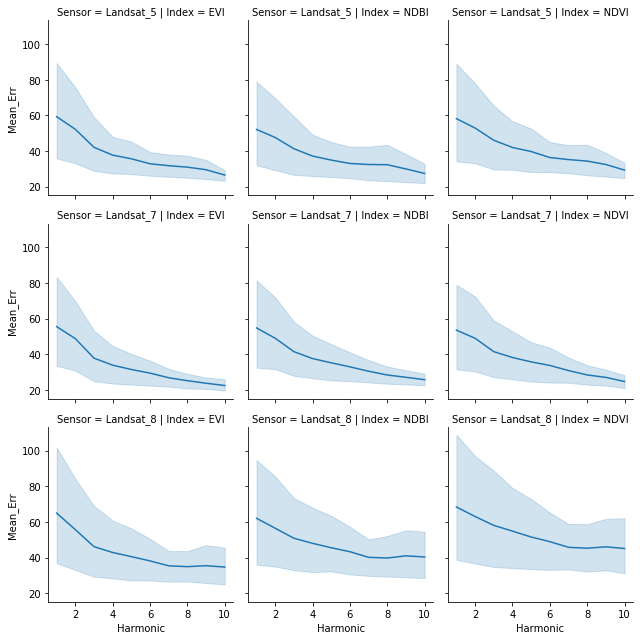

In [283]:
# make a series of figures indicates how Mean-Err changes along Harmonic
g = sns.FacetGrid(data=single_index,row='Sensor',col='Index')
g.map(sns.lineplot,'Harmonic','Mean_Err')

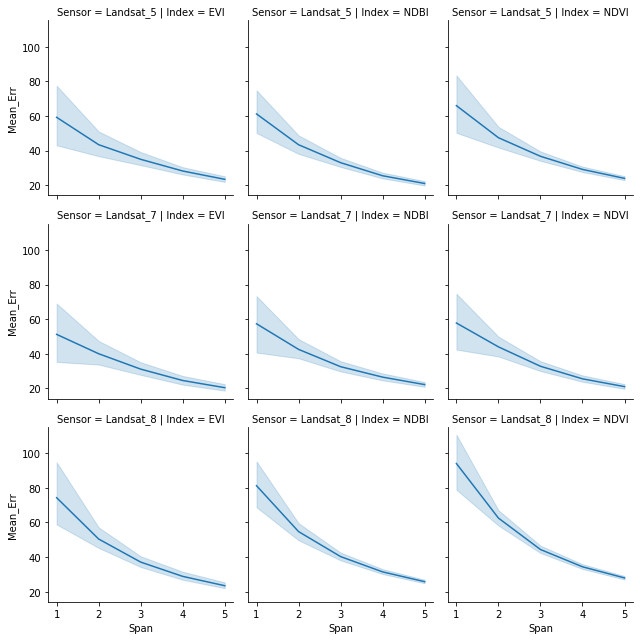

In [285]:
# make a series of figures indicates how Mean-Err changes along Year-rane
g = sns.FacetGrid(data=single_index,row='Sensor',col='Index')
g.map(sns.lineplot,'Span','Mean_Err')